   # IMPORTING THE REQUIRED LIBRARIES

In [374]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

# Application_data upload and check

In [375]:
application_data=pd.read_csv(r"C:\Users\HPPC\Desktop\CREDIT EDA ASSIGNMENT\application_data.csv")

In [376]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [352]:
## Finding the number of rows and columns in application_data
application_data.shape

(307511, 122)

In [187]:
application_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [188]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [353]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Previous_application data upload and check

In [354]:
previous_application=pd.read_csv(r"C:\Users\HPPC\Desktop\CREDIT EDA ASSIGNMENT\previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
previous_application.shape

(1670214, 37)

In [22]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [23]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [24]:
(previous_application.isnull().sum()*100)/1670214

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [191]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Data analysis of application_data

In [192]:
# Finding the percentage of missing values in the application_data set.

((application_data.isnull().sum()/307511)*100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [377]:
# Dropping all the columns in the application _data with more than 50% missing values.
# Keeping all the columns with <=50% missing values.

application_data=application_data.loc[:,((application_data.isnull().sum()*100)/307511)<=50]
application_data.shape

(307511, 81)

In [194]:
# Checking for missing values presence in the application_data after removing columns with more than 50% values. 

((application_data.isnull().sum()*100)/307511).sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
                                  ...    
NAME_HOUSING_TYPE                0.000000
NAME_FAMILY_STATUS               0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_INCOME_TYPE                 0.000000
SK_ID_CURR                       0.000000
Length: 81, dtype: float64

In [378]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [379]:
# Now the columns with missing values <=25% is to be checked and the others to be removed

application_data=application_data.loc[:,((application_data.isnull().sum()/307511)*100)<=25]
application_data.shape

(307511, 72)

In [380]:
# These columns contain minor missing values.
((application_data.isnull().sum()*100)/307511).sort_values(ascending=False)

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4 

In [381]:
# Finding columns with missing values less than 20% and greater than zero.
x=(application_data.isnull().sum()/307511)*100
application_data.columns[(x<20) & (x>0)]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

# Now checking for the values to impute in columns

In [382]:
# Checking the AMT_ANNUITY column.
application_data.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

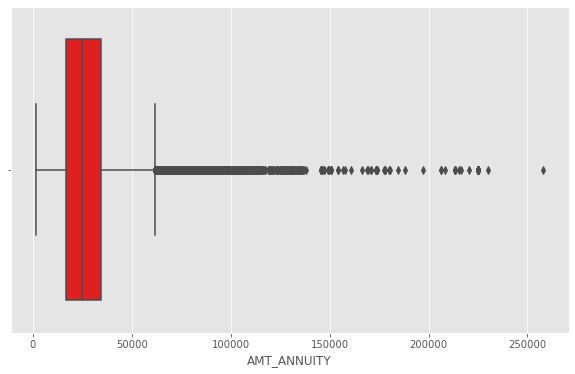

In [34]:
# As it is clear that AMT_ANNUITY column is a continuous variable, so checking for the presence of outliers in it by plotting a boxplot.
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.boxplot(application_data['AMT_ANNUITY'],color='r')
plt.show()

### As boxplot above shows outliers are present so median can be used to impute the column.

In [199]:
# Checking CNT_FAM_MEMBERS column.
application_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

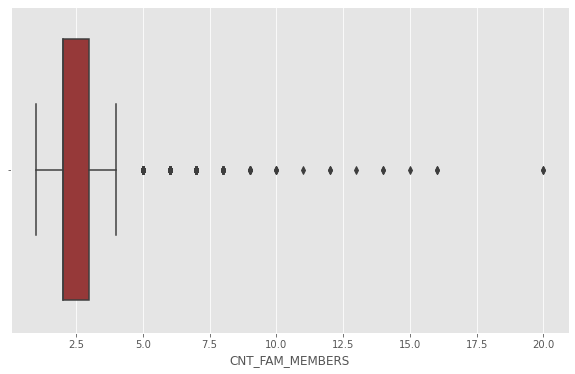

In [36]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.boxplot(application_data['CNT_FAM_MEMBERS'],color='brown')
plt.show()

### Since the ouliers are cleraly seen and they can be imputed with the median.

In [200]:
# Checking EXT_SOURCE_2 for imputation

application_data.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

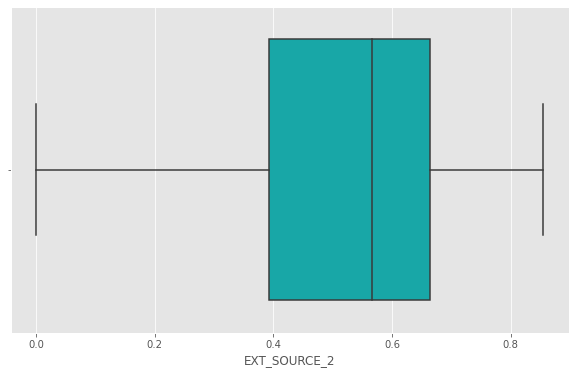

In [38]:
# Since Ext_source_2 is a continuous variable ,so using boxplot to chech for outliers.
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.boxplot(application_data['EXT_SOURCE_2'],color='c')
plt.show()

### No outliers have been found out as it is clear from above boxplot.Therefore the missing values can be imputed with mean values.

In [201]:
# Checking the AMT_GOODS_PRICE column:-

application_data.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

### AMT_GOODS_PRICE is a continuous variable so plotting a boxplot to check for outliers.

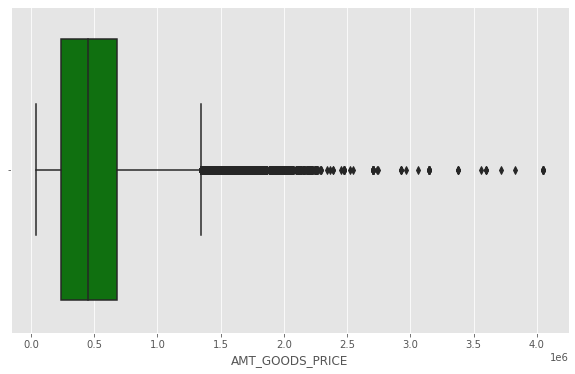

In [40]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.boxplot(application_data['AMT_GOODS_PRICE'],color='g')
plt.show()

### As seen above from the boxplot the outliers are present so median will be used to impute the missing values.



In [202]:
application_data['AMT_GOODS_PRICE'].median()

450000.0

In [203]:
application_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Checking the following columns for numeric/categorical data type

In [204]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [205]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [206]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [46]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [207]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [48]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

### As it is clear from above analysis that the columns 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'contain year,month,days,quarter,day,hour ,they are categorical variables with dtype int64 as required.

### Since they are categorical variables so mode can be used to impute the column. The mode for all the variables is '0' which can be imputed.

In [208]:
# Checking for the columns which have no requirement in the analysis and dropping them.

application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [383]:
Col_not_wanted=['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [384]:
# Dropping the columns as the information from these columns will not give any fruitful analysis.
application_data.drop(columns=Col_not_wanted,inplace=True)

In [385]:
application_data.shape  # Finding the shape now which shows 41 columns left.

(307511, 41)

In [213]:
application_data.info()         # Checking now the info about remaining columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [54]:
application_data.nunique().sort_values()         # Finding the unique values in application_data and getting a sorted list of them.

REG_CITY_NOT_WORK_CITY             2
TARGET                             2
NAME_CONTRACT_TYPE                 2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
FLAG_MOBIL                         2
REG_CITY_NOT_LIVE_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
OBS_30_CNT_SOCIAL_CIRCLE          33
O

### From above it can be noted that from TARGET to ORGANIZATION_TYPE the columns are 'categorical' type, so changing the data type to 'object'.

In [358]:
cols_categorical=['TARGET','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
       'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','CNT_CHILDREN', 'CNT_FAM_MEMBERS','ORGANIZATION_TYPE']

In [359]:
for column in cols_categorical:
    application_data[column]=application_data[column].astype('object')

In [216]:
application_data.info()   # Checking that the above categorical columns dtype changed to object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  object 
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  object 
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [217]:
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


### As clear from above that the  days column 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' respectively are having negative values.As days cannot be in negative, so there are definitely some errors in these columns which need to be corrected. 

In [360]:
# Taking the absolute values of the values in these columns.
cols_days=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
application_data[cols_days]=application_data[cols_days].abs()

In [219]:
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373
std,4363.988632,139443.751806,3522.886321,1509.450419
min,7489.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000
max,25229.000000,365243.000000,24672.000000,7197.000000


In [361]:
# Now converting these columns from days into years dividing by 365.25 as the true length of a year on earth is 365.25
application_data[cols_days]=application_data[cols_days]//365.25

In [362]:
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.405137,184.837329,13.158209,7.706404
std,11.945779,381.589859,9.640275,4.131408
min,20.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,5.000000,4.000000
50%,43.000000,6.000000,12.000000,8.000000
75%,53.000000,15.000000,20.000000,11.000000
max,69.000000,999.000000,67.000000,19.000000


In [363]:
# Renaming the days columns as they have been converted to year.
application_data.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True)

In [222]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  object 
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  object 
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [223]:
# Checking the CODE_GENDER variable
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [224]:
# Removing the XNA from CODE_GENDER as the value for it is very small and it will not affect our analysis.

application_data=application_data[~(application_data["CODE_GENDER"]=='XNA')]

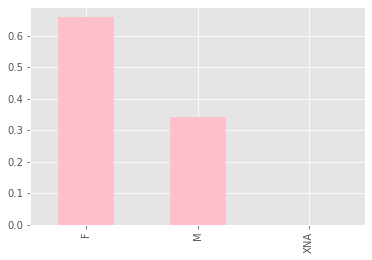

In [364]:
application_data['CODE_GENDER'].value_counts(normalize=True).plot.bar(color='pink')
plt.show()

### The bar graph above shows the percentage of females are much greater than males.Here M-Males,F-Females


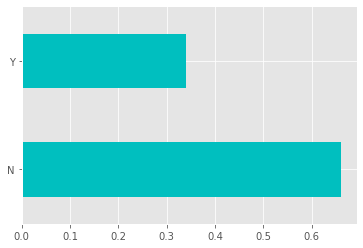

In [66]:
application_data.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh(color='c')
plt.show()

### Clients not having car are more in comparison to those having a car.

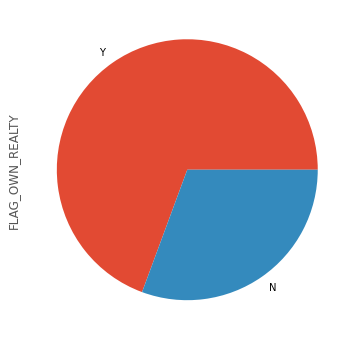

In [67]:
plt.figure(figsize=[10,6])
application_data.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie()
plt.show()

### Clients having house/flat have a higher percentage than those not having house/flat.

In [68]:
# Checking for outliers .
application_data['CNT_CHILDREN']=application_data['CNT_CHILDREN'].astype('object')
application_data.CNT_CHILDREN.value_counts()          

0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

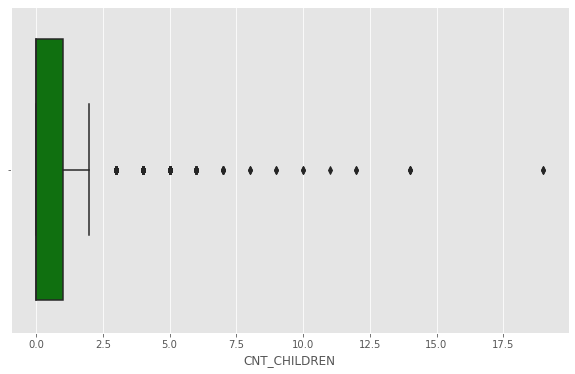

In [69]:
# The outliers are present as number of children cannot be in such a large number for a client.So using boxplot to check for outliers.
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.boxplot(application_data['CNT_CHILDREN'],color='g')
plt.show()

### The outliers are clearly visible in the above boxplot ,so they can be imputed with median value.

In [225]:
# Checking the NAME_TYPE_SUITE column.
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

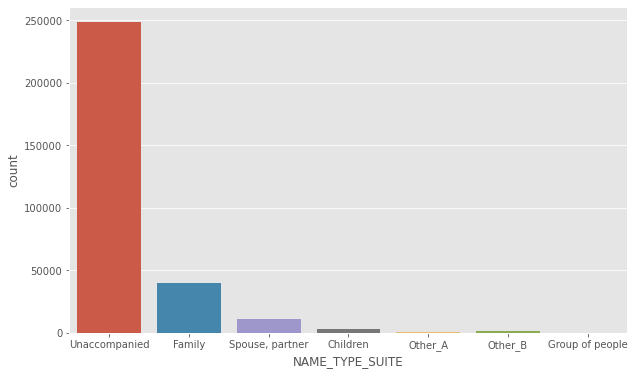

In [226]:
# As it is clear that NAME_TYPE_SUITE is a categorical variable, so mode can be used to impute the column and a count plot can be used for presentation.
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.countplot(application_data['NAME_TYPE_SUITE'])
plt.show()

### Here mode is clearly 'unaccompanied' category.

In [73]:
## Checking for the AMT_INCOME_TOTAL and AMT_CREDIT variables

application_data[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075070e+05,3.075070e+05
mean,1.687977e+05,5.990286e+05
std,2.371246e+05,4.024926e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [75]:
application_data['AMT_INCOME_TOTAL'].quantile([0.0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [76]:
# Dividing the Total income into income group.

IncomeRange=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000','1000000-1250000','1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000','2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000','3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000','5000000+']
application_data['INCOME_GROUP']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins=[0,100000,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,2500000,2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,125000000],labels= IncomeRange)

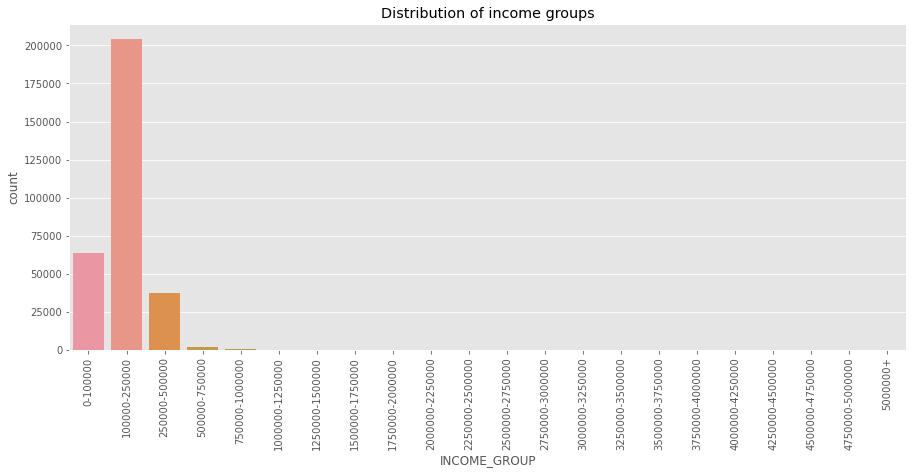

In [77]:
# The income groups formed have been displayed through a countplot.
plt.figure(figsize=[15,6])
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.title("Distribution of income groups")
sns.countplot(application_data['INCOME_GROUP'])
plt.show()

In [78]:
# Dividing the AMT_CREDIT into AMT_CREDIT_GROUP.

CreditRange=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000','1000000-1250000','1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000','2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000','3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000','5000000+']
application_data['AMT_CREDIT_GROUP']=pd.cut(application_data['AMT_CREDIT'],bins=[0,100000,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,2500000,2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,125000000],labels= IncomeRange)

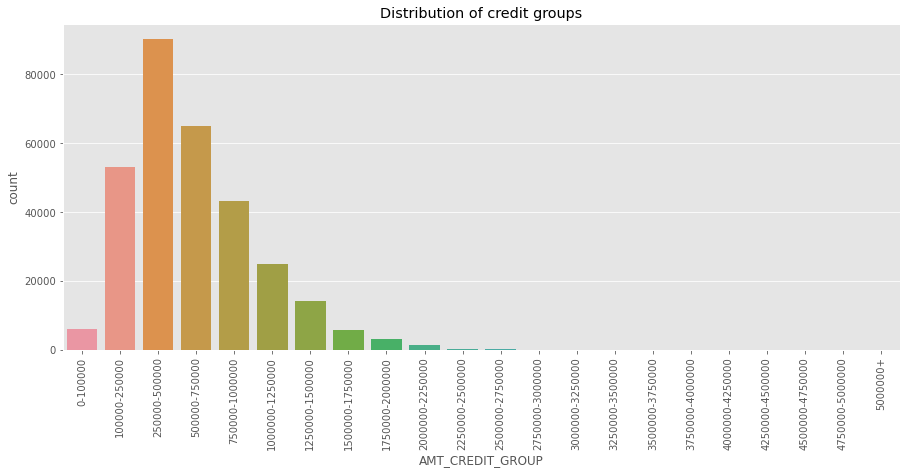

In [79]:
plt.figure(figsize=[15,6])
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.title('Distribution of credit groups')
sns.countplot(application_data['AMT_CREDIT_GROUP'])
plt.show()

### From above it can be inferenced that loan applications have been received mostly in the group 250000-500000.The second most applied category amount wise is 500000-750000.This shows that large borrower applications are very less .Large number of applications come for a medium amount of loan.

In [365]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.0,1.0,9.0,5.0,NaN,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.0,3.0,3.0,0.0,NaN,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,0.0,11.0,6.0,26.0,1,Laborers,1.0,MONDAY,9,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0,26.0,6.0,NaN,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House /

In [366]:
# Checking the YEARS_BIRTH column :

application_data.YEARS_BIRTH.describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

In [367]:
# Here the age group lies between 20 and 69 years , both being the minimum and maximum years respectively.
# Dividing the age into age groups.
application_data['AGE_GROUP']=pd.cut(application_data['YEARS_BIRTH'],bins=np.arange(20,70,5))

In [368]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.0,1.0,9.0,5.0,NaN,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,"(20, 25]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.0,3.0,3.0,0.0,NaN,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(40, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,0.0,11.0,6.0,26.0,1,Laborers,1.0,MONDAY,9,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(50, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0,26.0,6.0,NaN,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"(50, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Seco

In [84]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307507 non-null  int64   
 1   TARGET                      307507 non-null  int64   
 2   NAME_CONTRACT_TYPE          307507 non-null  object  
 3   CODE_GENDER                 307507 non-null  object  
 4   FLAG_OWN_CAR                307507 non-null  object  
 5   FLAG_OWN_REALTY             307507 non-null  object  
 6   CNT_CHILDREN                307507 non-null  object  
 7   AMT_INCOME_TOTAL            307507 non-null  float64 
 8   AMT_CREDIT                  307507 non-null  float64 
 9   AMT_ANNUITY                 307495 non-null  float64 
 10  AMT_GOODS_PRICE             307229 non-null  float64 
 11  NAME_TYPE_SUITE             306215 non-null  object  
 12  NAME_INCOME_TYPE            307507 non-null  object  
 13 

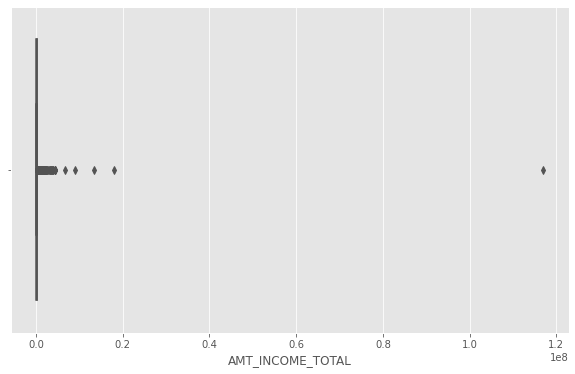

In [85]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()

### A boxplot showing that an outlier is present in AMT_INCOME_TOTAL column.

In [86]:
application_data[application_data['AMT_INCOME_TOTAL'] == application_data['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_GROUP,AGE_GROUP
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5000000+,500000-750000,NaN


In [ ]:
# The OCCUPATION_TYPE is labourer with income total 117000000.0,which is not possible so it  can be imputed with the median value.

In [87]:
# Checking YEARS_EMPLOYED variable:
application_data.YEARS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
12588         1
8229          1
12794         1
11823         1
8694          1
Name: YEARS_EMPLOYED, Length: 12574, dtype: int64

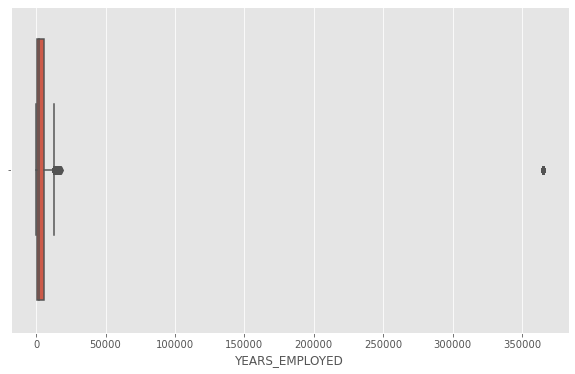

In [88]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.boxplot(application_data['YEARS_EMPLOYED'])
plt.show()

### As YEARS_EMPLOYED shows how many years before the application the person started current employment, which definitely cannot be 999.0 which is the highest number of values. So they can be imputed with the next higher which is 1 years before.

In [ ]:
# Finding the CREDIT-INCOME RATIO:


In [89]:
application_data['CREDIT-INCOME RATIO ']=application_data['AMT_CREDIT']//application_data['AMT_INCOME_TOTAL']

In [369]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.0,1.0,9.0,5.0,NaN,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,"(20, 25]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.0,3.0,3.0,0.0,NaN,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(40, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,0.0,11.0,6.0,26.0,1,Laborers,1.0,MONDAY,9,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(50, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0,26.0,6.0,NaN,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"(50, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Seco

## Checking the TARGET variable ,DEFAULTER vs NON-DEFAULTER

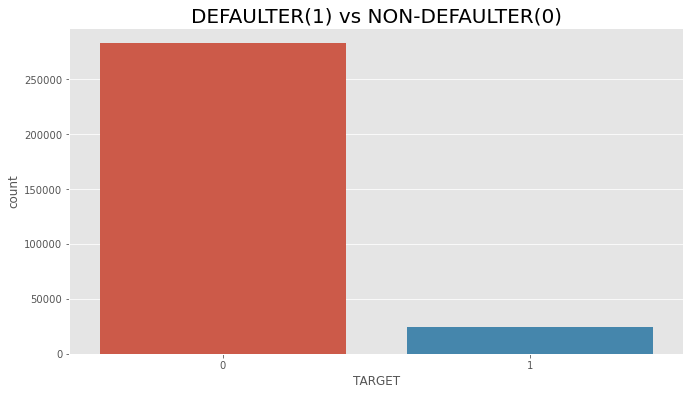

In [91]:
plt.figure(figsize=[11,6])
plt.style.use('ggplot')
plt.xlabel("TARGET")
plt.ylabel('COUNT OF TARGET VARIABLE')
plt.title("DEFAULTER(1) vs NON-DEFAULTER(0)",fontdict={'fontsize':20})
sns.countplot(application_data['TARGET'])
plt.show()

In [92]:
application_data['TARGET'].value_counts(normalize=True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

### The above analysis shows that 92 % clients are non-defaulters and 8 % are defaulters. This is clearly a case of highly  imbalanced dataset.

In [93]:
application_data['TARGET'].value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [94]:
Data_Imbalance_Ratio=282682//24825
Data_Imbalance_Ratio

11

### For 1 defaulter we have 11 non_defaulters.This is the data imbalance ratio. 

In [387]:
application_data.shape

(307511, 41)

In [96]:

application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307507 non-null  int64   
 1   TARGET                      307507 non-null  int64   
 2   NAME_CONTRACT_TYPE          307507 non-null  object  
 3   CODE_GENDER                 307507 non-null  object  
 4   FLAG_OWN_CAR                307507 non-null  object  
 5   FLAG_OWN_REALTY             307507 non-null  object  
 6   CNT_CHILDREN                307507 non-null  object  
 7   AMT_INCOME_TOTAL            307507 non-null  float64 
 8   AMT_CREDIT                  307507 non-null  float64 
 9   AMT_ANNUITY                 307495 non-null  float64 
 10  AMT_GOODS_PRICE             307229 non-null  float64 
 11  NAME_TYPE_SUITE             306215 non-null  object  
 12  NAME_INCOME_TYPE            307507 non-null  object  
 13 

In [389]:
# Taking the utmost required columns ahead for further analysis and dropping the rest of the columns.
application_data.drop(columns=['REGION_POPULATION_RELATIVE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR'],inplace=True)

In [390]:
application_data.shape

(307511, 28)

In [391]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_CURR                 307511 non-null  int64  
 1   TARGET                     307511 non-null  int64  
 2   NAME_CONTRACT_TYPE         307511 non-null  object 
 3   CODE_GENDER                307511 non-null  object 
 4   FLAG_OWN_CAR               307511 non-null  object 
 5   FLAG_OWN_REALTY            307511 non-null  object 
 6   CNT_CHILDREN               307511 non-null  int64  
 7   AMT_INCOME_TOTAL           307511 non-null  float64
 8   AMT_CREDIT                 307511 non-null  float64
 9   AMT_ANNUITY                307499 non-null  float64
 10  AMT_GOODS_PRICE            307233 non-null  float64
 11  NAME_TYPE_SUITE            306219 non-null  object 
 12  NAME_INCOME_TYPE           307511 non-null  object 
 13  NAME_EDUCATION_TYPE        30

In [ ]:
# So now we are left with 28 columns for further analysis.

### Splitting the dataframe 'application_data' into two separate dataframes 'app_data_0' and 'app_data_1'

In [392]:
app_data_0=application_data[application_data['TARGET']==0]  # Non-defaulters dataframe
app_data_1=application_data[application_data['TARGET']==1]  # Defaulters dataframe


In [393]:
app_data_0.shape

(282686, 28)

In [394]:
app_data_1.shape

(24825, 28)

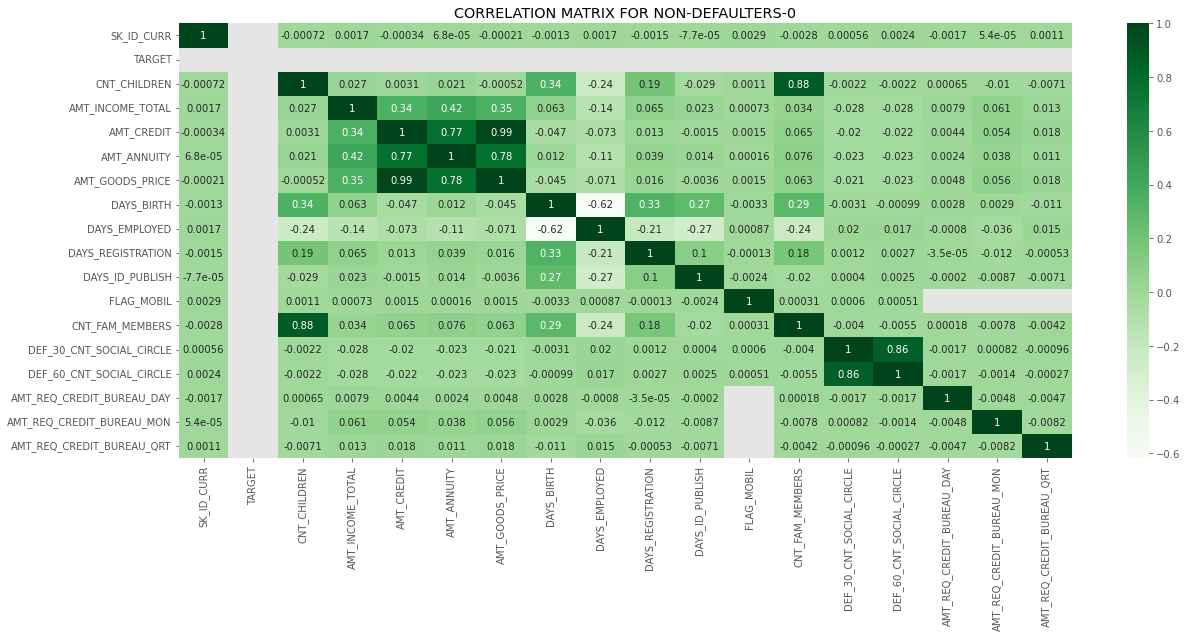

In [413]:
# CORRELATION MATRIX FOR NON-DEFAULTERS-0
plt.figure(figsize=[20,8])
plt.style.use('ggplot')
plt.title('CORRELATION MATRIX FOR NON-DEFAULTERS-0')
sns.heatmap(app_data_0.corr(),annot=True,cmap='Greens')
plt.show()

### TOP 10 CORRELATIONS FROM THE NON-DEFAULTER-0 MATRIX-


In [114]:
#SR.NO.	VAR1	                 VAR2	                   Correlation_Value
#1	AMT_GOODS_PRICE	          AMT_CREDIT	                  0.99
#2	CNT_FAM_MEMBERS	          CNT_CHILDREN	                  0.88
#3	DEF_60_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE	      0.86
#4	AMT_GOODS_PRICE	          AMT_ANNUITY	                  0.78
#5	AMT_ANNUITY  	           AMT_CREDIT 	                  0.77
#6	AMT_ANNUITY	              AMT_INCOME_TOTAL	              0.42
#7	AMT_GOODS_PRICE	          AMT_INCOME_TOTAL	              0.35
#8	AMT_CREDIT	              AMT_INCOME_TOTAL	              0.34
#9  DAYS_BIRTH                CNT_CHILDREN                    0.34
#10	DAYS_REGISTRATION	      DAYS_BIRTH	                  0.33


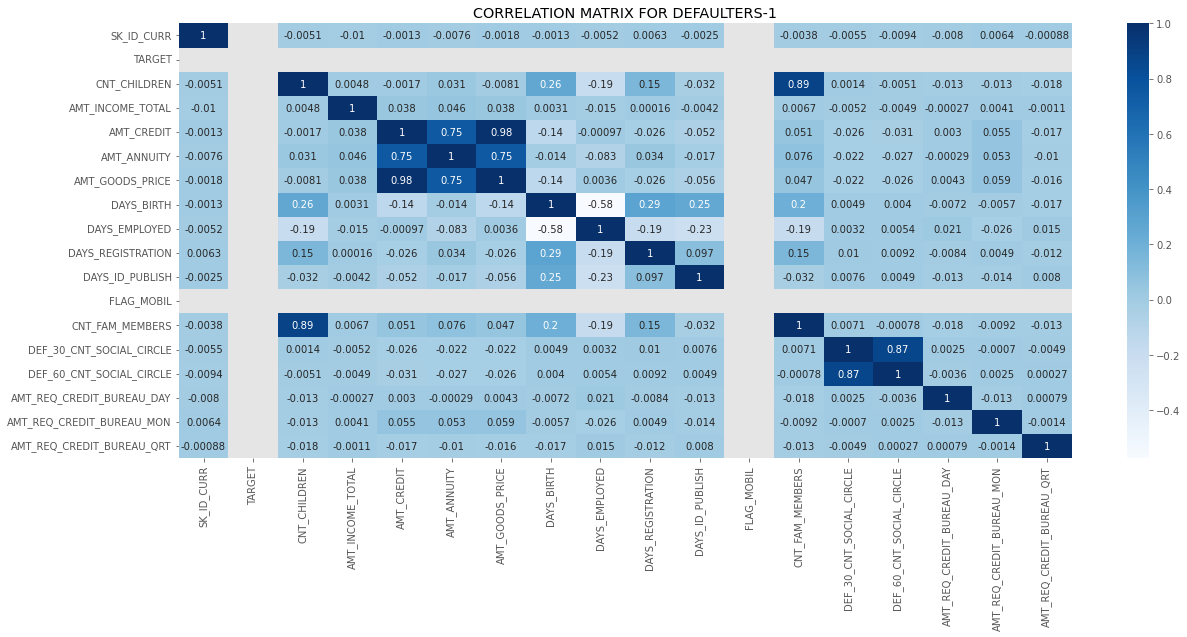

In [414]:
# COORELATION MATRIX FOR DEFAULTERS-1
plt.figure(figsize=[20,8])
plt.style.use('ggplot')
plt.title('CORRELATION MATRIX FOR DEFAULTERS-1')
sns.heatmap(app_data_1.corr(),annot=True,cmap='Blues')
plt.show()

### TOP 10 CORRELATIONS FROM DEFAULTERS-1


In [115]:
#SR.NO.	VAR1	                    VAR2	         Correlation_Value
#1	AMT_GOODS_PRICE	           AMT_CREDIT	             0.98
#2 CNT_FAM_MEMBERS             CNT_CHILDREN              0.89
#3 DEF_60_CNT_SOCIAL_CIRCLE   DEF_30_CNT_SOCIAL_CIRCLE   0.87
#4	AMT_GOODS_PRICE	           AMT_ANNUITY	             0.75
#5	AMT_ANNUITY	               AMT_CREDIT	             0.75
#4	DAYS_REGISTRATION          DAYS_BIRTH	             0.29
#5	DAYS_BIRTH	               CNT_CHILDREN	             0.26
#6	DAYS_ID_PUBLISH	           DAYS_BIRTH	             0.25
#7	CNT_FAM_MEMBERS            CNT_CHILDREN	             0.20
#8	DAYS_REGISTRATION	       YEARS_BIRTH	             0.15
#9  CNT_FAM_MEMBERS            AMT_ANNUITY               0.076
#10	DAYS_REGISTRATION	       DAYS_EMPLOYED	         0.034



In [116]:
# The top 3 correlations are same i.e. var1 and var2 and the values are approximately the same.

## Let us proceed for Univariate Analysis

In [117]:
# Below is the list of the variables found in correlation matrix for both the dataframes of non-defaulters and defaulters
VAR_LIST=['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY','YEARS_EMPLOYED','YEARS_BIRTH','AMT_INCOME_TOTAL']

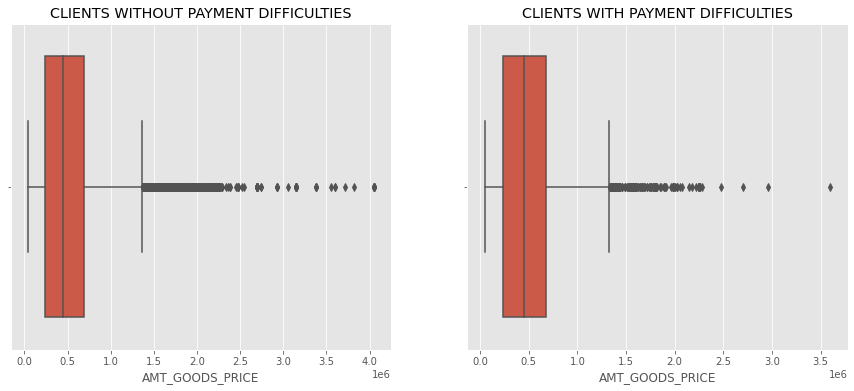

In [118]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.boxplot(app_data_0['AMT_GOODS_PRICE'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.boxplot(app_data_1['AMT_GOODS_PRICE'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

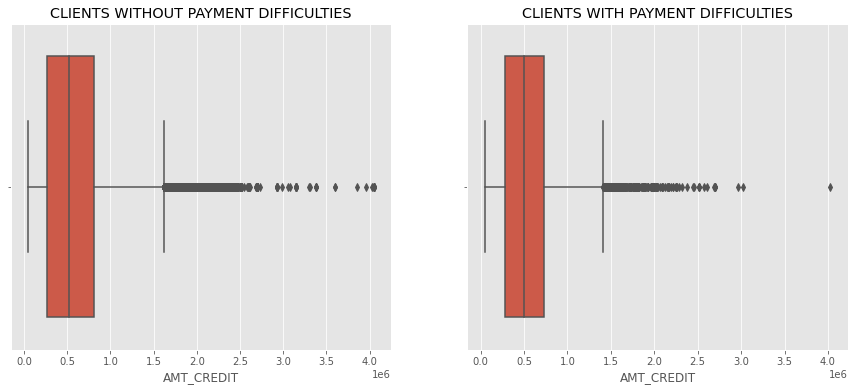

In [119]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.boxplot(app_data_0['AMT_CREDIT'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.boxplot(app_data_1['AMT_CREDIT'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()


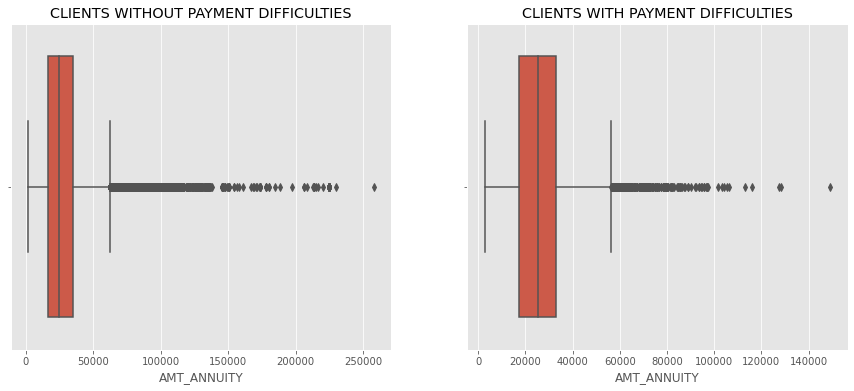

In [120]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.boxplot(app_data_0['AMT_ANNUITY'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.boxplot(app_data_1['AMT_ANNUITY'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

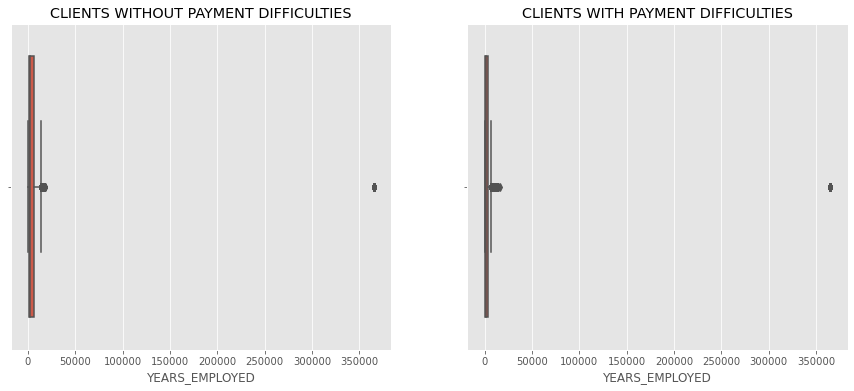

In [121]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.boxplot(app_data_0['YEARS_EMPLOYED'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.boxplot(app_data_1['YEARS_EMPLOYED'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

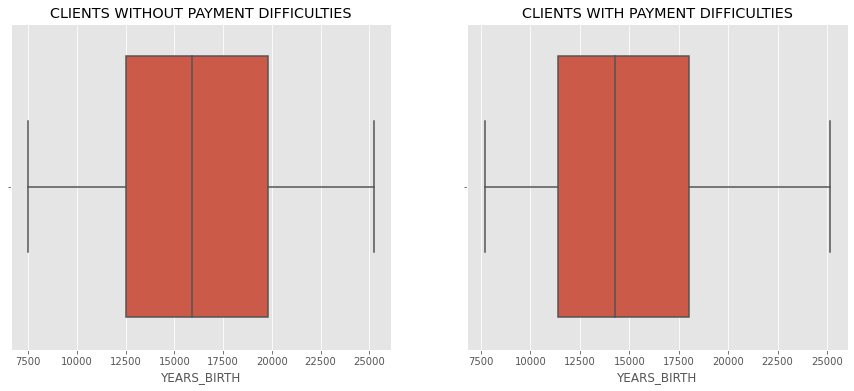

In [122]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.boxplot(app_data_0['YEARS_BIRTH'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.boxplot(app_data_1['YEARS_BIRTH'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

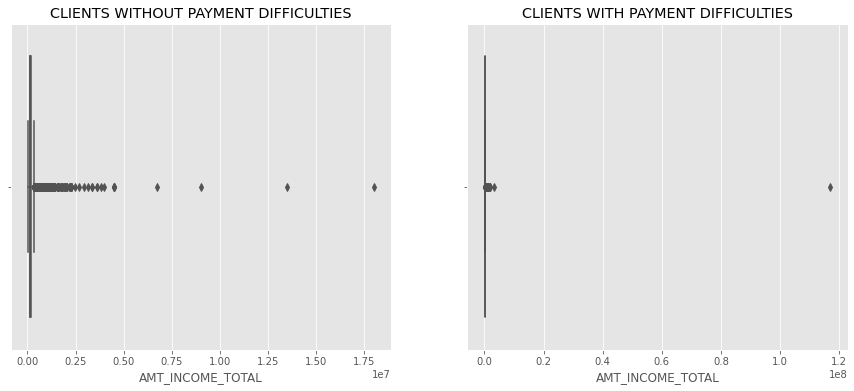

In [123]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.boxplot(app_data_0['AMT_INCOME_TOTAL'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.boxplot(app_data_1['AMT_INCOME_TOTAL'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

In [397]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_CURR                 307511 non-null  int64  
 1   TARGET                     307511 non-null  int64  
 2   NAME_CONTRACT_TYPE         307511 non-null  object 
 3   CODE_GENDER                307511 non-null  object 
 4   FLAG_OWN_CAR               307511 non-null  object 
 5   FLAG_OWN_REALTY            307511 non-null  object 
 6   CNT_CHILDREN               307511 non-null  int64  
 7   AMT_INCOME_TOTAL           307511 non-null  float64
 8   AMT_CREDIT                 307511 non-null  float64
 9   AMT_ANNUITY                307499 non-null  float64
 10  AMT_GOODS_PRICE            307233 non-null  float64
 11  NAME_TYPE_SUITE            306219 non-null  object 
 12  NAME_INCOME_TYPE           307511 non-null  object 
 13  NAME_EDUCATION_TYPE        30

In [398]:
# Changing to category type.
cols_categ=['TARGET','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
       'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']

In [399]:
for column in cols_categ:
    application_data[column]=application_data[column].astype('category')

In [400]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   SK_ID_CURR                 307511 non-null  int64   
 1   TARGET                     307511 non-null  category
 2   NAME_CONTRACT_TYPE         307511 non-null  category
 3   CODE_GENDER                307511 non-null  category
 4   FLAG_OWN_CAR               307511 non-null  category
 5   FLAG_OWN_REALTY            307511 non-null  category
 6   CNT_CHILDREN               307511 non-null  int64   
 7   AMT_INCOME_TOTAL           307511 non-null  float64 
 8   AMT_CREDIT                 307511 non-null  float64 
 9   AMT_ANNUITY                307499 non-null  float64 
 10  AMT_GOODS_PRICE            307233 non-null  float64 
 11  NAME_TYPE_SUITE            306219 non-null  category
 12  NAME_INCOME_TYPE           307511 non-null  category
 13  NAME_EDUCATION

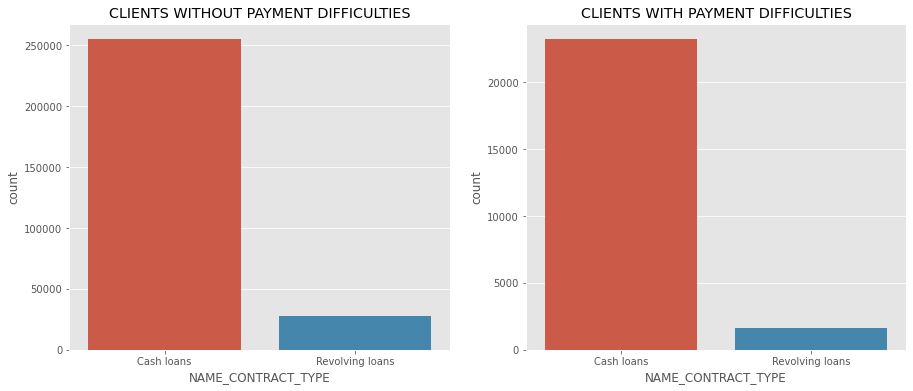

In [401]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.countplot(app_data_0['NAME_CONTRACT_TYPE'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.countplot(app_data_1['NAME_CONTRACT_TYPE'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### As shown above clients with or without payment difficulties are taking cash loans.

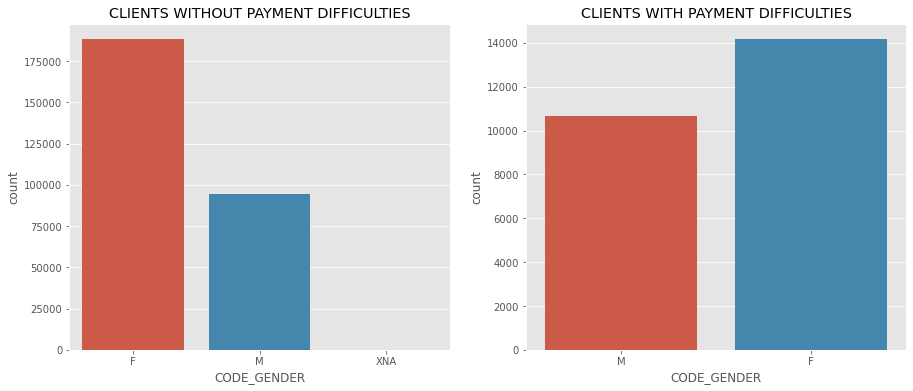

In [402]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.countplot(app_data_0['CODE_GENDER'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.countplot(app_data_1['CODE_GENDER'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### Females are more in both cases with/without payment difficulties.

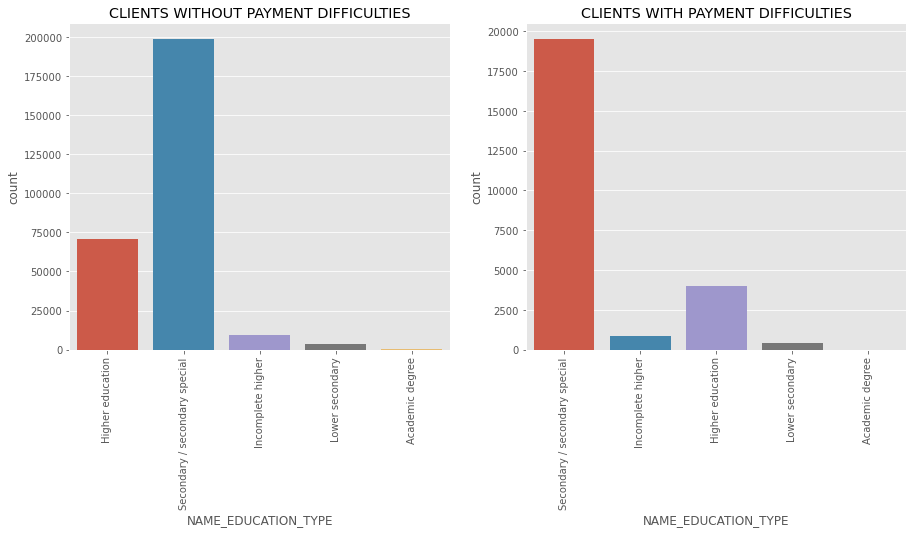

In [403]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.countplot(app_data_0['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.countplot(app_data_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### Clients with and without payment difficulties belong to secondary education category.

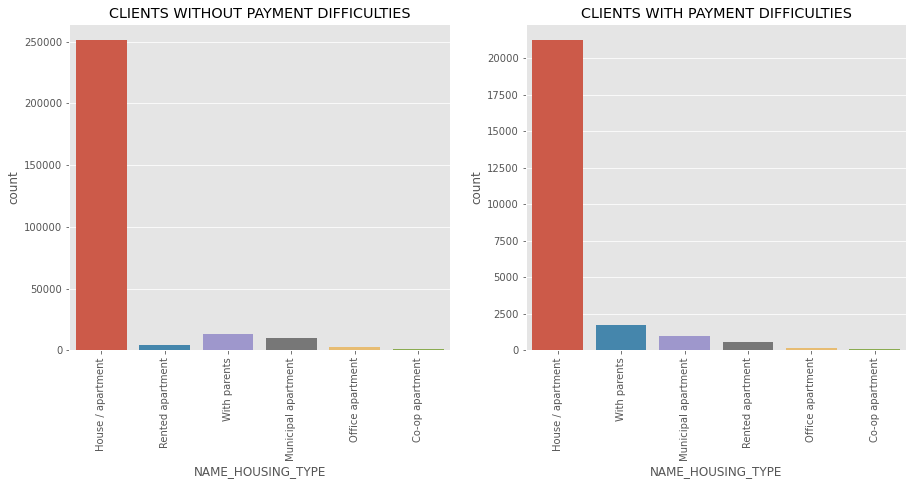

In [404]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.countplot(app_data_0['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.countplot(app_data_1['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### Clients are more having a house/apartment in both the cases i.e they may be taking loans for the house/apartment renovation etc.

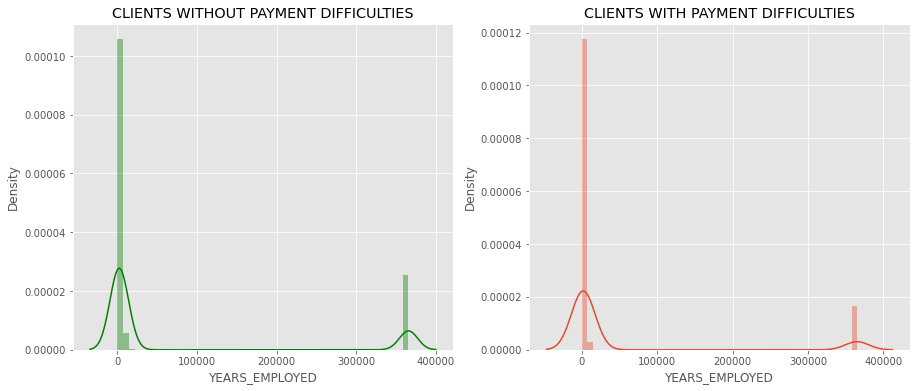

In [140]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.distplot(app_data_0['YEARS_EMPLOYED'],color='g')
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.distplot(app_data_1['YEARS_EMPLOYED'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### Most clients have a work experience of less than 1 year as shown above with/without payment difficulties.

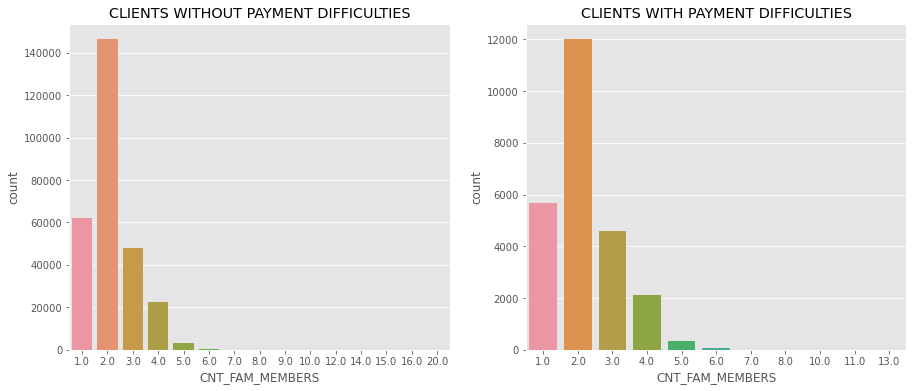

In [141]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.countplot(app_data_0['CNT_FAM_MEMBERS'])
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.countplot(app_data_1['CNT_FAM_MEMBERS'])
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### Clients with 2 family members are applying for loan (maximum in number) with/without payment difficulties.

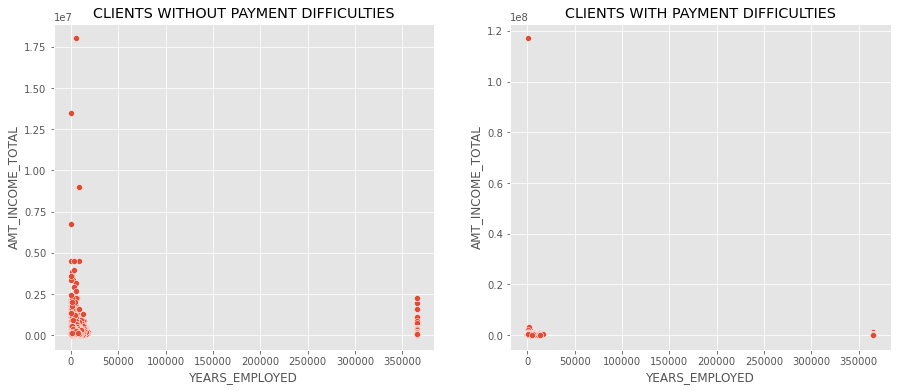

In [142]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.scatterplot(x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL',data=app_data_0)
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.scatterplot(x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL',data=app_data_1)
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### Total years for which the clients have been employed/working is approximately less than 50 years and having good income level in case of without payment difficulties.
### In case of payment with difficulties the clients have been employed for comparitively lesser number of years and have low income level.

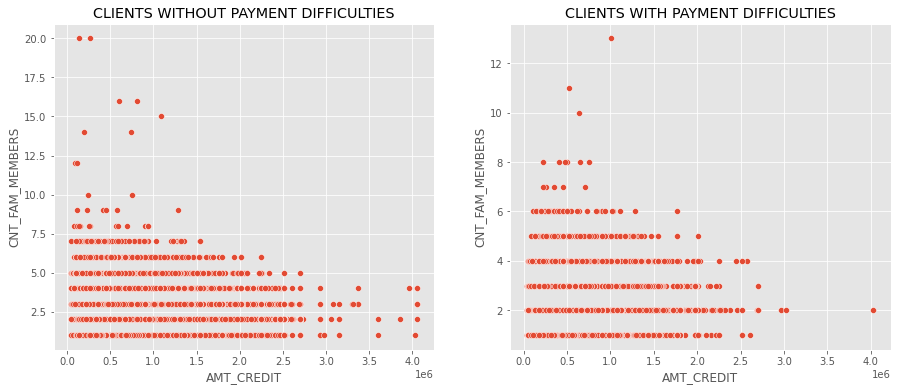

In [143]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.scatterplot(x='AMT_CREDIT',y='CNT_FAM_MEMBERS',data=app_data_0)
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.scatterplot(x='AMT_CREDIT',y='CNT_FAM_MEMBERS',data=app_data_1)
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### Clients with lesser count of family members take small loans and are more in number.Clients taking large amount of loan are defaulting less with a comparitive good number of family members .

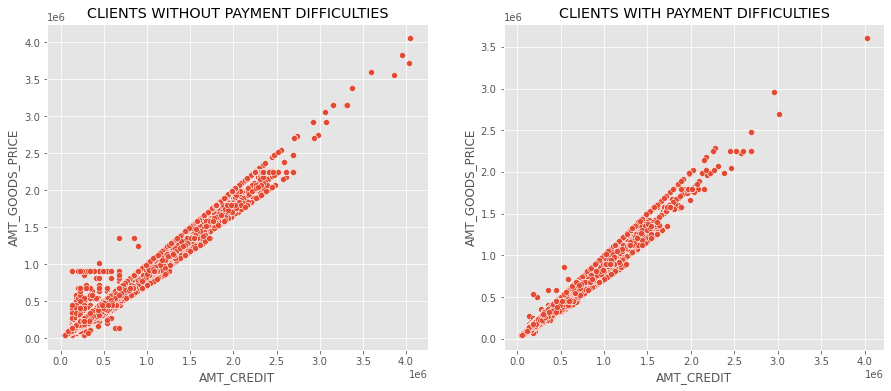

In [144]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=app_data_0)
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.subplot(1,2,2)
ax=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=app_data_1)
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.show()

### It is clear from above that goods price has positive correlation with credit amount which should be the case .

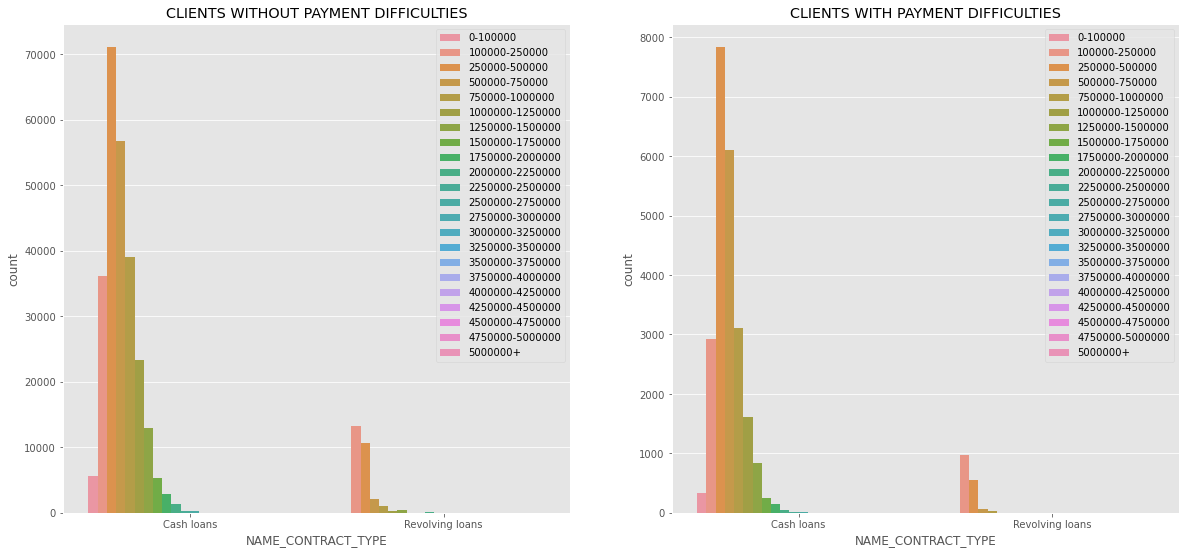

In [145]:
plt.figure(figsize=[20,9])
plt.subplot(1,2,1)
ax=sns.countplot(x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_GROUP',data=app_data_0)
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.legend(loc='upper right')
plt.subplot(1,2,2)
ax=sns.countplot(x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_GROUP',data=app_data_1)
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.legend(loc='upper right')
plt.show()

### As shown above clients with/without payment difficulties are preferring cash loans instead of revolving loans for the different credit groups formed.

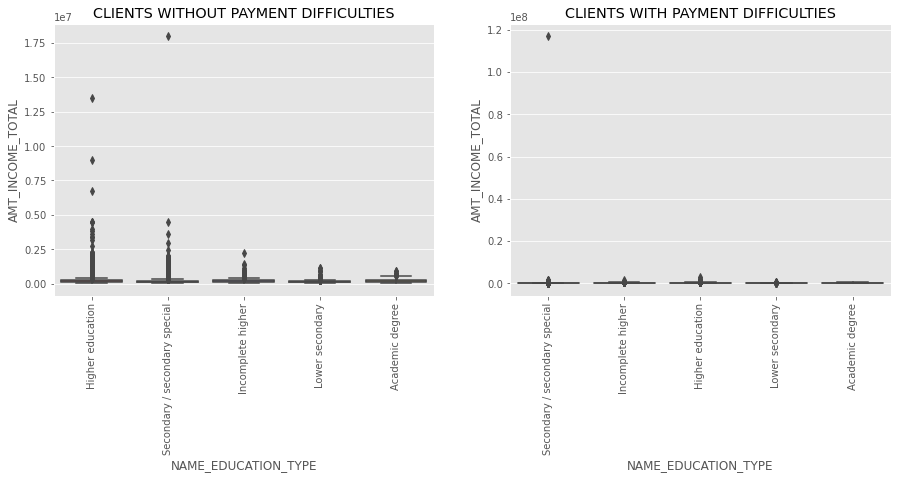

In [146]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
ax=sns.boxplot(y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE',data=app_data_0)
plt.title("CLIENTS WITHOUT PAYMENT DIFFICULTIES")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax=sns.boxplot(y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE',data=app_data_1)
plt.title("CLIENTS WITH PAYMENT DIFFICULTIES")
plt.xticks(rotation=90)
plt.show()

### Boxplots above show that the clients without payment difficulties have a good total income and those with payment difficulties have small total income thus making defaults.

### Now analyzing previous_application data set 

In [147]:
previous_application.shape

(1670214, 37)

In [148]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [149]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [150]:
# Checking the percentage of missing values in each ocolumn of 'previous_application' dataset.
((previous_application.isnull().sum()/1670214)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [151]:
### Dropping the columns with more than 50% missing values.
previous_application=previous_application.loc[:,((previous_application.isnull().sum()*100)/1670214)<=50]
previous_application.shape

(1670214, 33)

In [157]:
# Now analysing the categorical variables.
# Creating a function for the same.

def cat(var):
    plt.style.use('ggplot')
    fig,ax=plt.subplots(1,1,figsize=[15,6])
    
    sns.countplot(x=var,hue='NAME_CONTRACT_STATUS',ax=ax,data=previous_application)
    ax.set_title(f'Distribution of {var}',fontsize=12)
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=10)
    plt.show()

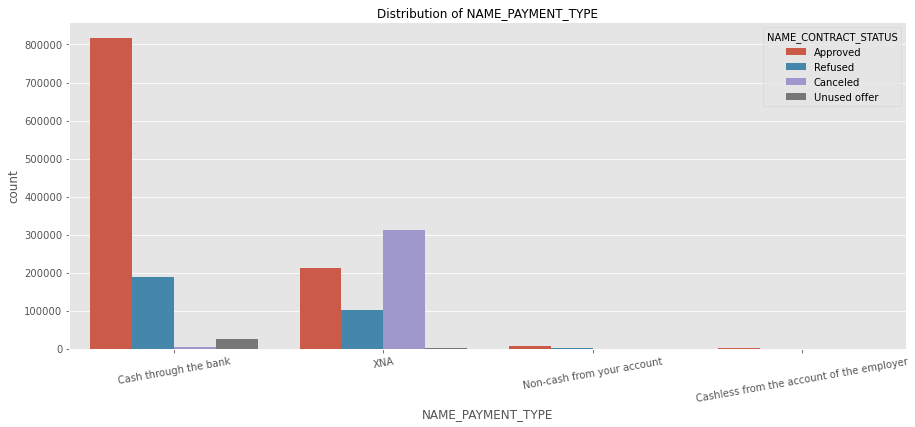

In [158]:
cat('NAME_PAYMENT_TYPE')

### As it is clear from above that the clients have preferred the 'cash through the bank' payment option over other methods of payment

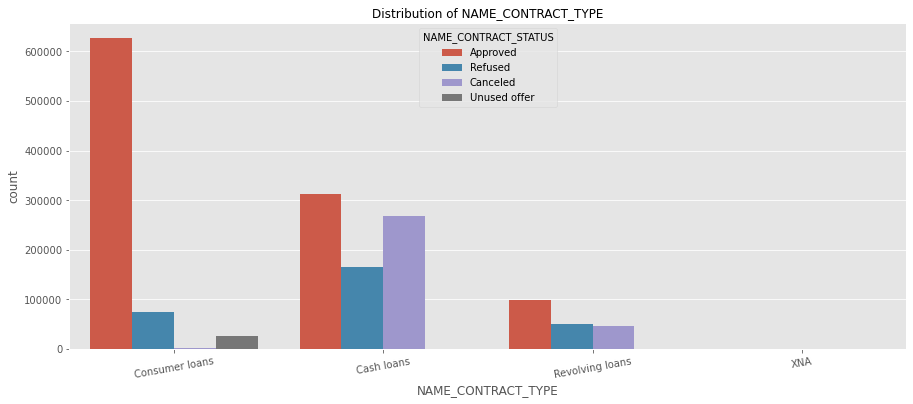

In [159]:
cat('NAME_CONTRACT_TYPE')

### Above graph shows that clients ask for consumer and cash loans in large number and after that 3rd position comes for revolving loans.The loans which are refused in large numbers are cash loans.

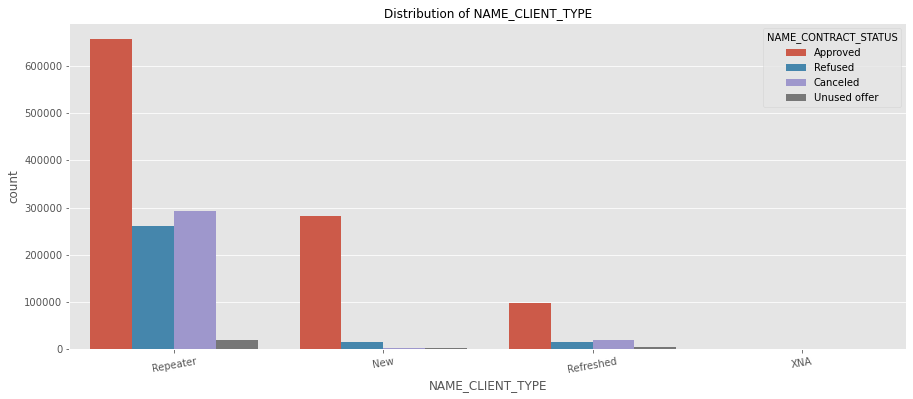

In [160]:
cat('NAME_CLIENT_TYPE')

### The graph above shows that the loan applications which have been approved is highest in case of repeaters and the 2nd category is new clients.The highest number of applications have been rejected in case of repeaters.

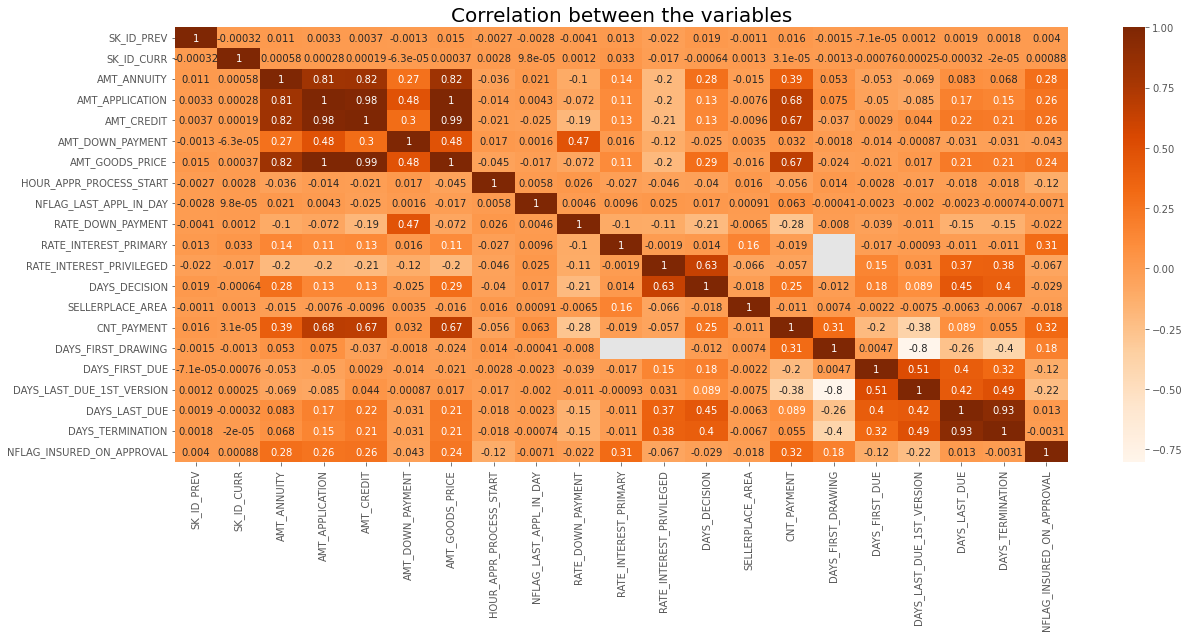

In [234]:
# Correlation between the variables in previous_application datset.
previous_application.corr()
plt.figure(figsize=[20,8])
sns.heatmap(data=previous_application.corr(),annot=True,cmap="Oranges")
plt.title("Correlation between the variables",fontsize=20)
plt.show()

In [235]:
## As per the correlation matrix and heatmap plotted above , the top 10 correlations are given below;
#Sr. No.              Var1                          Var2                            Correlation value
#1.              AMT_GOODS_PRICE                 AMT_APPLICATION                       0.99
#2.             AMT_GOODS_PRICE                  AMT_CREDIT                            0.99
#3.              AMT_CREDIT                      AMT_APPLICATION                       0.98
#4.             DAYS_TERMINATION                 DAYS_LAST_DUE                         0.93
#5.             AMT_GOODS_PRICE                  AMT_ANNUITY                           0.82
#6.             AMT_CREDIT                       AMT_ANNUITY                           0.82
#7.             AMT_APPLICATION                  AMT_ANNUITY                           0.81
#8.             CNT_PAYMENT                      AMT_APPLICATION                       0.68
#9.             CNT_PAYMENT                      AMT_CREDIT                            0.67
#10.            CNT_PAYMENT                      AMT_GOODS_PRICE                       0.67

## BIVARIATE ANALYSIS.

<Figure size 1440x576 with 0 Axes>

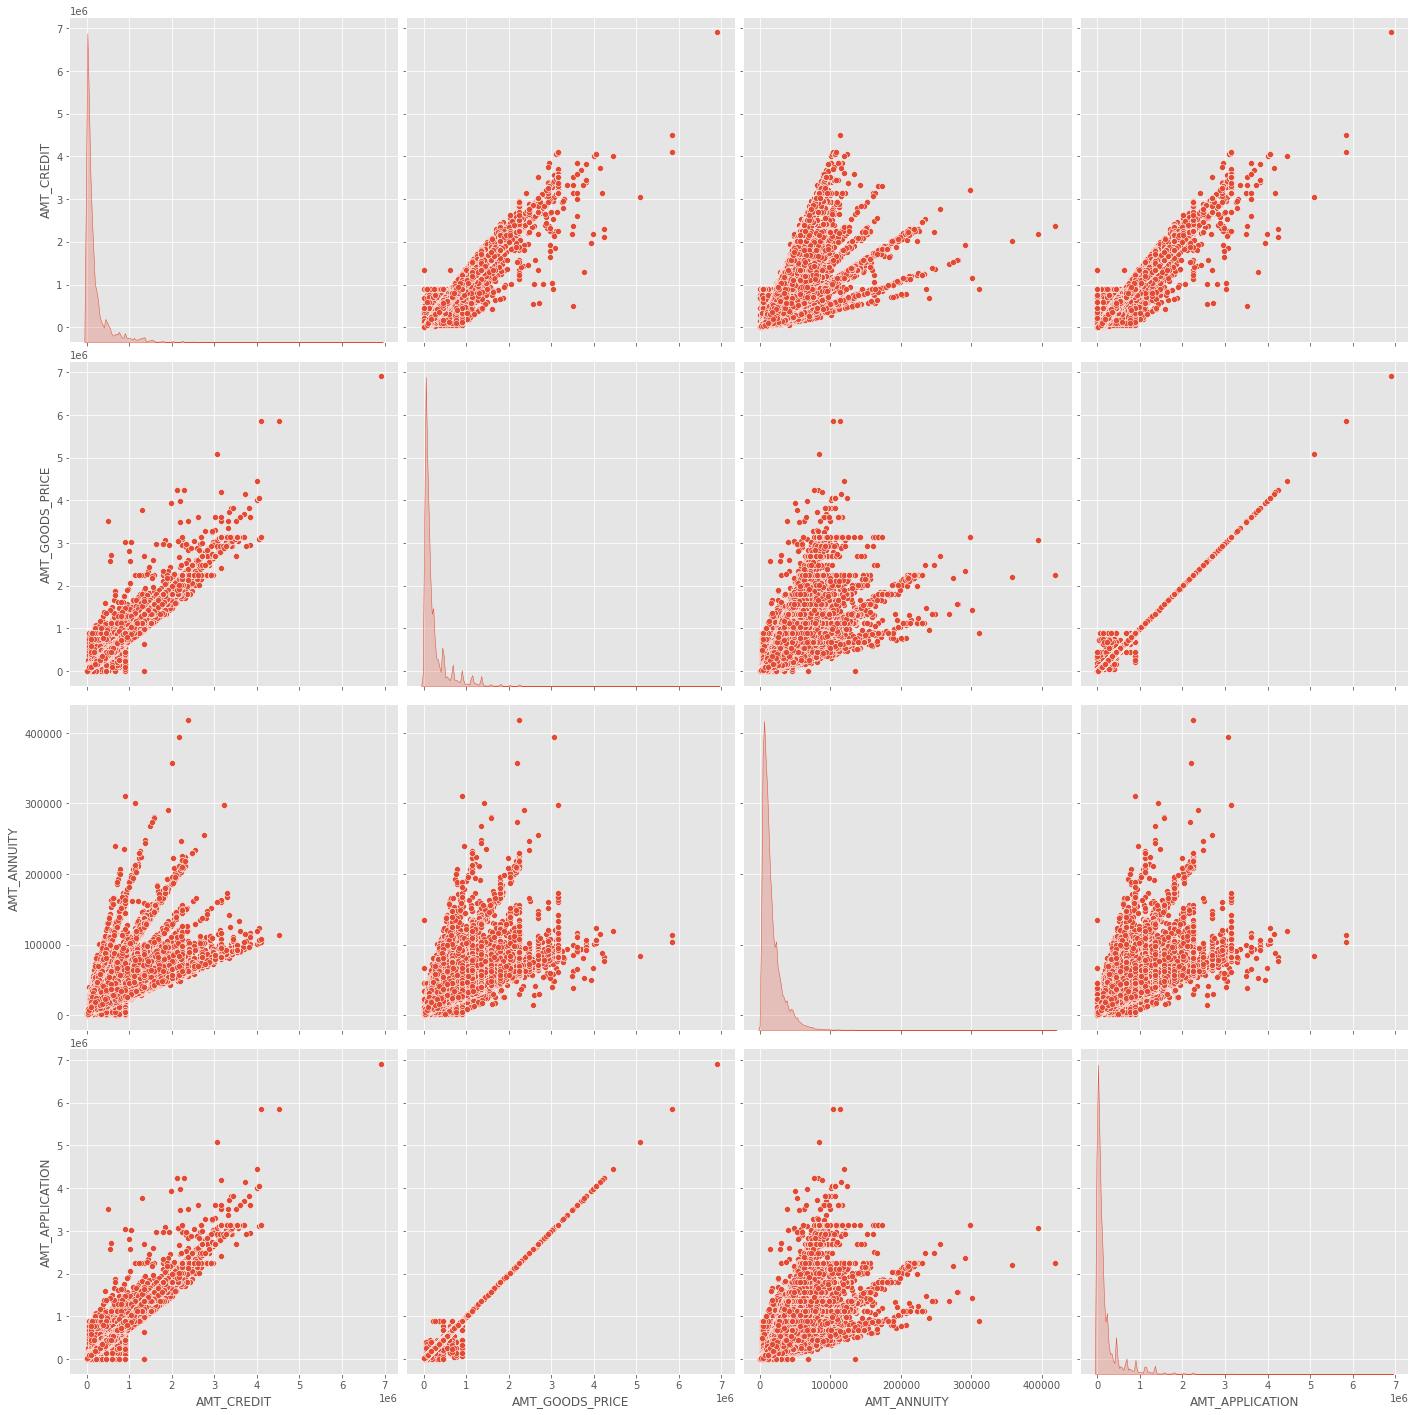

In [237]:
## Plotting pairplots to see the high correaltion between the correlated variables from the above table.
plt.figure(figsize=[20,8])
sns.pairplot(previous_application[['AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','AMT_ANNUITY','AMT_APPLICATION']],diag_kind='kde',size=5)
plt.show()

In [238]:
# Points to be noted from the above plots----->
# 1. AMT_CREDIT is highly correlated to the AMT_GOODS_PRICE i.e. credit is given according to the goods price(with client).
# 2. AMT_annuity is highly correlated to credit amount,goods price,application amount.


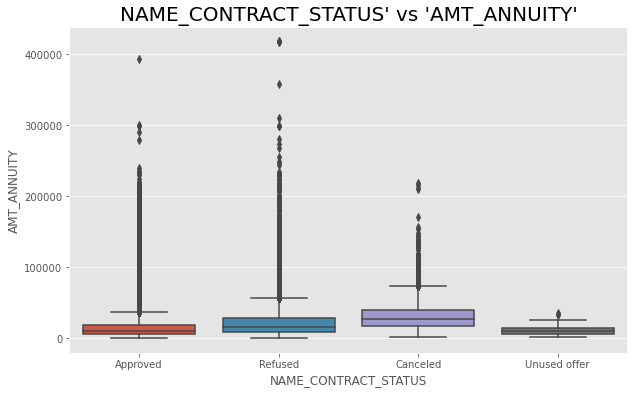

In [244]:
plt.figure(figsize=[10,6])
sns.boxplot(data=previous_application,x='NAME_CONTRACT_STATUS',y='AMT_ANNUITY')
plt.title("NAME_CONTRACT_STATUS' vs 'AMT_ANNUITY'",fontsize=20)
plt.show()

In [245]:
# Points to be noted:
# 1. The applications with high annuity faced refusal/unused offer.
# 2. The applications with very low annuity have been refused or kept as unused offer.


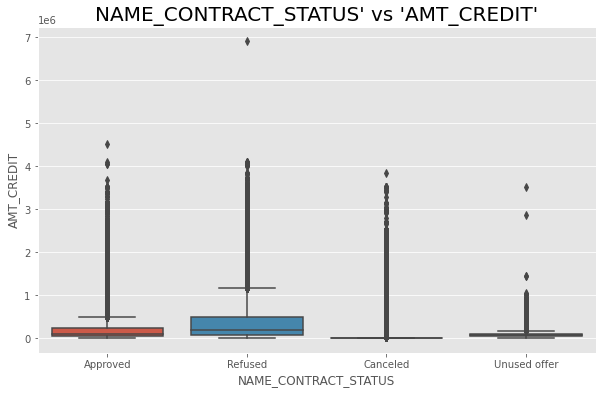

In [247]:
plt.figure(figsize=[10,6])
sns.boxplot(data=previous_application,x='NAME_CONTRACT_STATUS',y='AMT_CREDIT')
plt.title("NAME_CONTRACT_STATUS' vs 'AMT_CREDIT'",fontsize=20)
plt.show()

### From above figure it can be said that credit amount if low or high ,is either cancelled/kept as unused offer and refused respectively.

# MERGING THE TWO DATAFRAMES 'application_data' and 'previous_application' to get the final dataframe(final_df) for analysis.


In [407]:
# Using left join here as we need all the rows in application data and we will get all the data about each applicant.
# If we use inner join then we will loose the data of new clients which donot have any record with us previously.
final_df=pd.merge(left=application_data,right=previous_application,how='left',on='SK_ID_CURR')

In [408]:
final_df.shape


(1430155, 64)

In [409]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  category
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  category
 3   CODE_GENDER                  1430155 non-null  category
 4   FLAG_OWN_CAR                 1430155 non-null  category
 5   FLAG_OWN_REALTY              1430155 non-null  category
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x            1428936 non-null  float64 
 11  NAME_TYPE_SUITE_x            1426124 non-null  category
 12  NAME_INCOME_TYPE            

In [277]:
final_df.shape

(1430100, 61)

In [411]:
final_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

In [412]:
# Dividing the final_df into the approved,canceled,refused,unsued offer categories.
Approved_df=final_df[final_df['NAME_CONTRACT_STATUS']=='Approved']
Canceled_df=final_df[final_df['NAME_CONTRACT_STATUS']=='Canceled']
Refused_df=final_df[final_df['NAME_CONTRACT_STATUS']=='Refused']
Unused_offer_df=final_df[final_df['NAME_CONTRACT_STATUS']=='Unused offer']

### Writing a function to make a comparitive analysis of various column variables.

In [338]:

def final_df_plots(var):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(ncols=2,nrows=2,figsize=(16,12),sharey=True)
    fig.tight_layout(pad=10.0)
    ax1=sns.countplot(ax=ax1,data=Approved_df,x=var)
    ax1.set_title("Approved", fontsize=15)
    ax1.set_ylabel("Figure of loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    
    ax2=sns.countplot(ax=ax2,data=Canceled_df,x=var)
    ax2.set_title("Canceled", fontsize=15)
    ax2.set_ylabel("Figure of loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    
    
    ax3=sns.countplot(ax=ax3,data=Refused_df,x=var)
    ax3.set_title("Refused", fontsize=15)
    ax3.set_xlabel(var)
    ax3.set_ylabel("Figure of loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
    
    ax4=sns.countplot(ax=ax4,data=Unused_offer_df,x=var)
    ax4.set_title("Unused_offer", fontsize=15)
    ax4.set_xlabel(var)
    ax4.set_ylabel("Figure of loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.show()

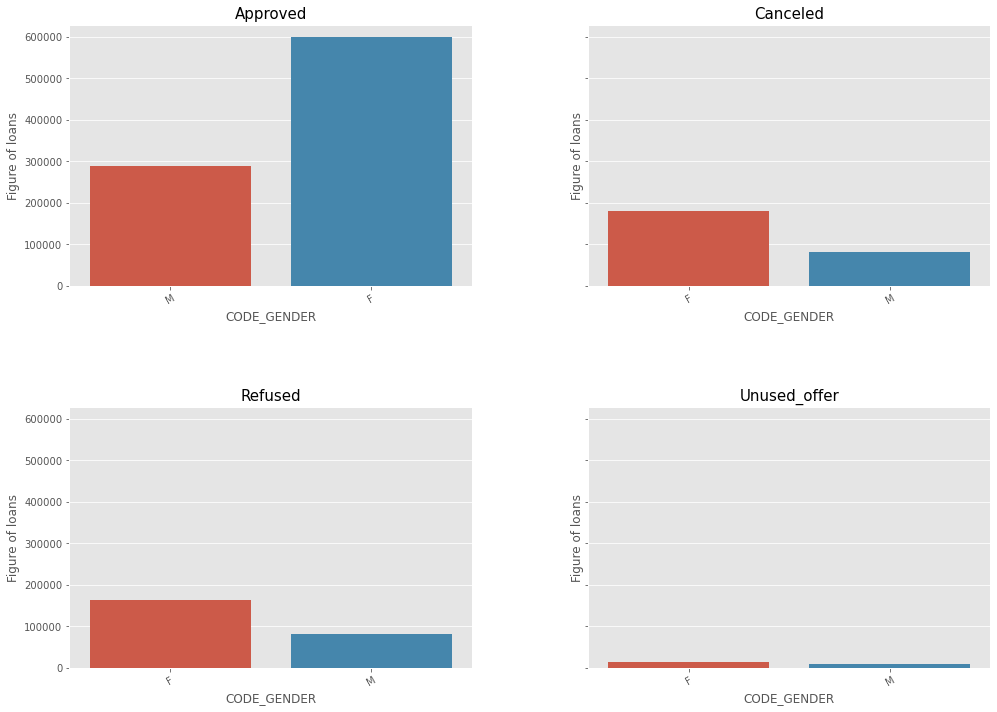

In [315]:
final_df_plots('CODE_GENDER')

### Females in all the above four cases are higher in number as compared to males i.e females are applying for loan in larger numbers as comparedto males.

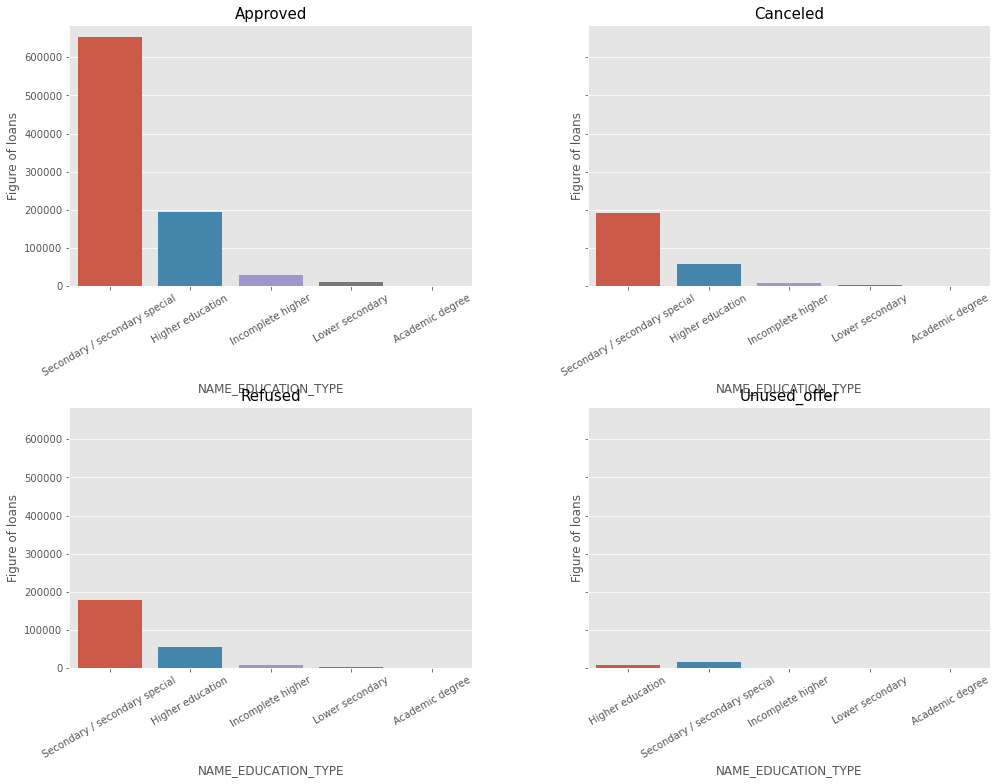

In [317]:
final_df_plots('NAME_EDUCATION_TYPE')

### The loans have been approved,cancelled,refused and kept as unused offer in highest numbers for the secondary/secondary special category of eduacted clients.

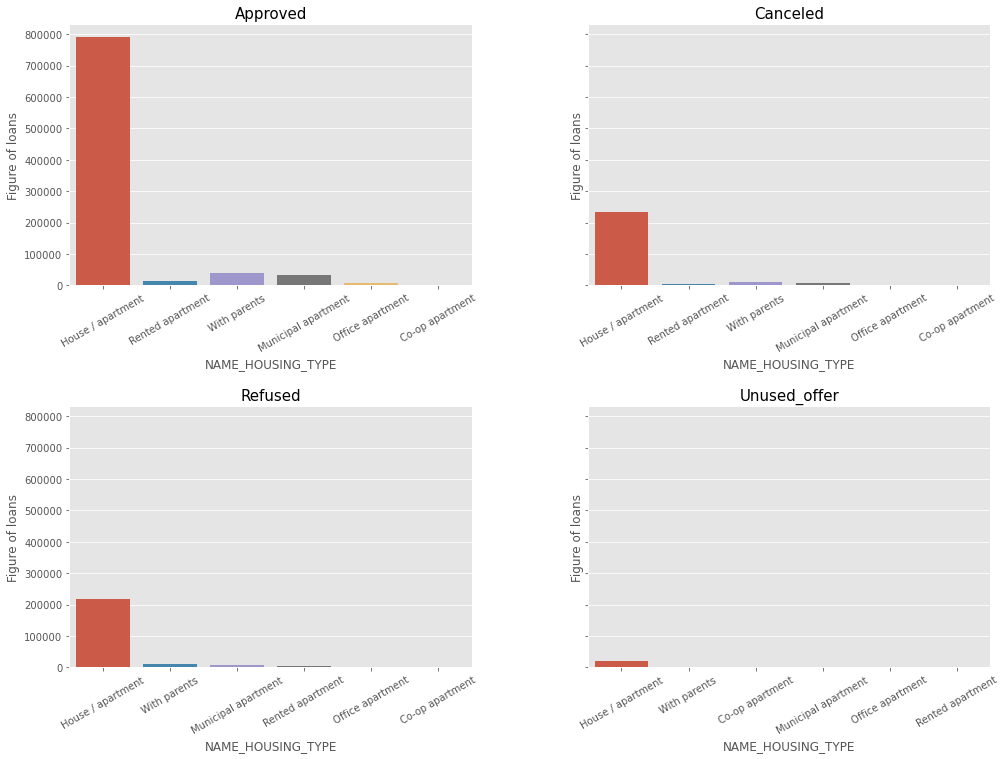

In [318]:
final_df_plots('NAME_HOUSING_TYPE')

### The loans have been approved,cancelled,refused and kept as unused offer in highest numbers for the clients having their own house/apartment.

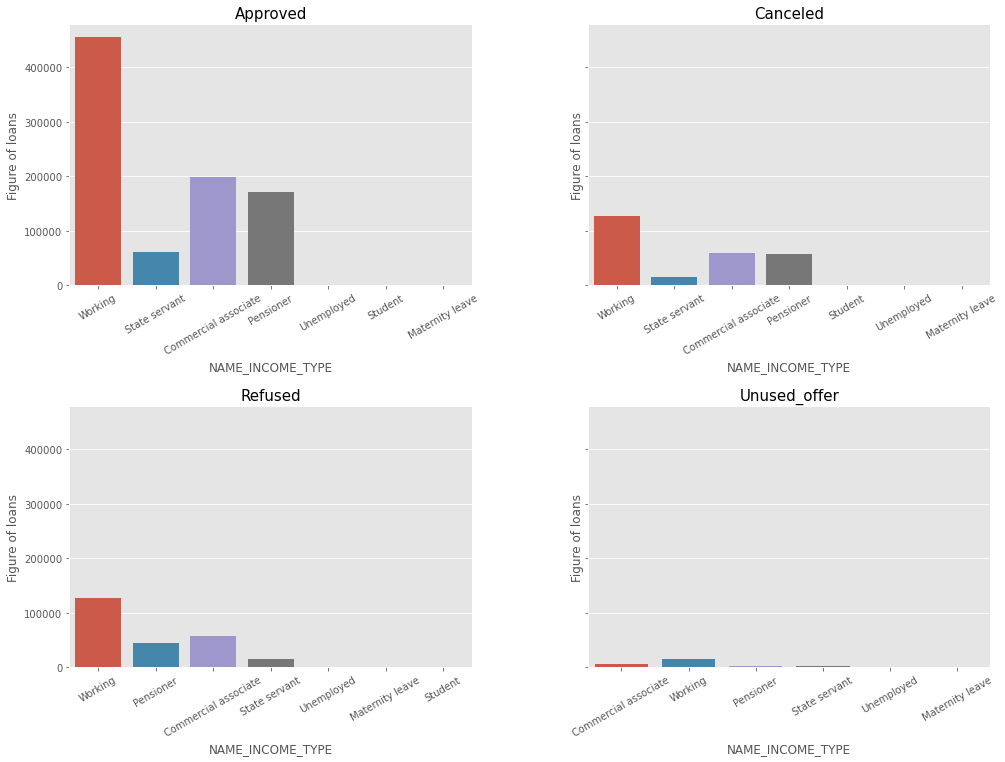

In [319]:
final_df_plots('NAME_INCOME_TYPE')

### The loans have been approved,cancelled,refused and kept as unused offer in highest numbers for the clients in the working category.

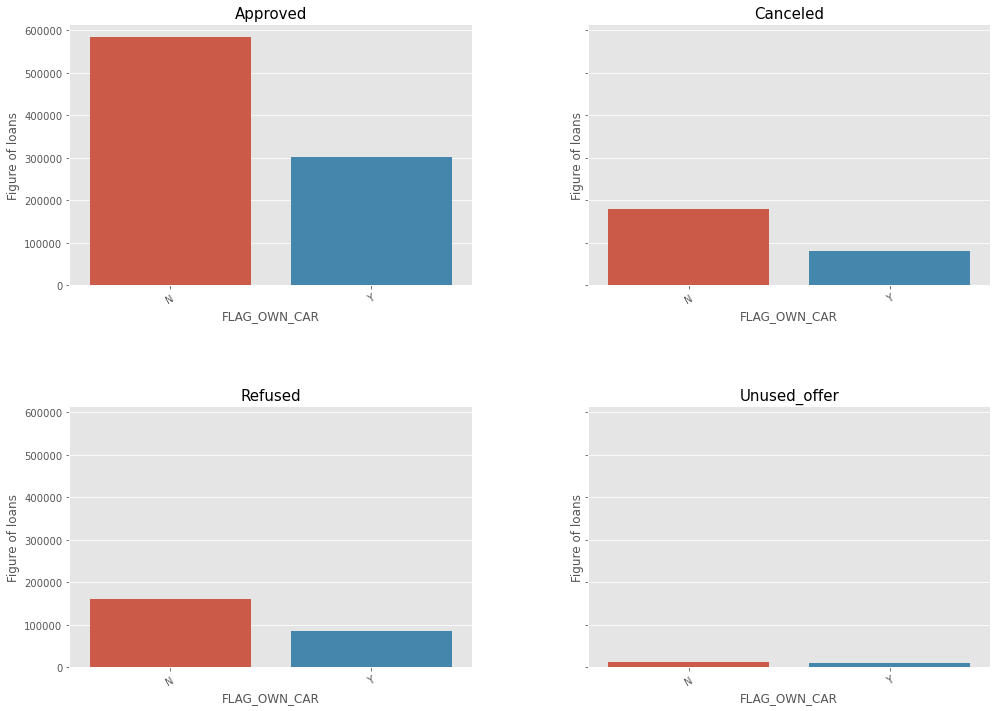

In [321]:
final_df_plots('FLAG_OWN_CAR')

### The loans have been approved,cancelled,refused and kept as unused offer in highest numbers for the clients not having an own car.

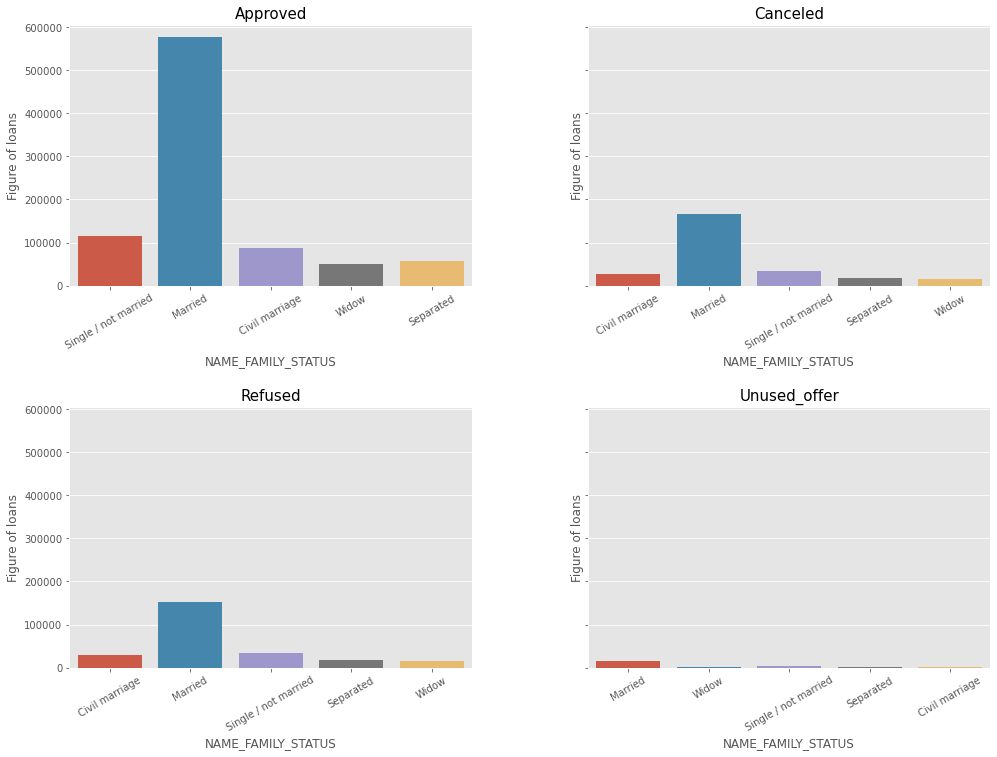

In [322]:
final_df_plots('NAME_FAMILY_STATUS')

### The loans have been approved,cancelled,refused and kept as unused offer in highest numbers for the clients in married category.

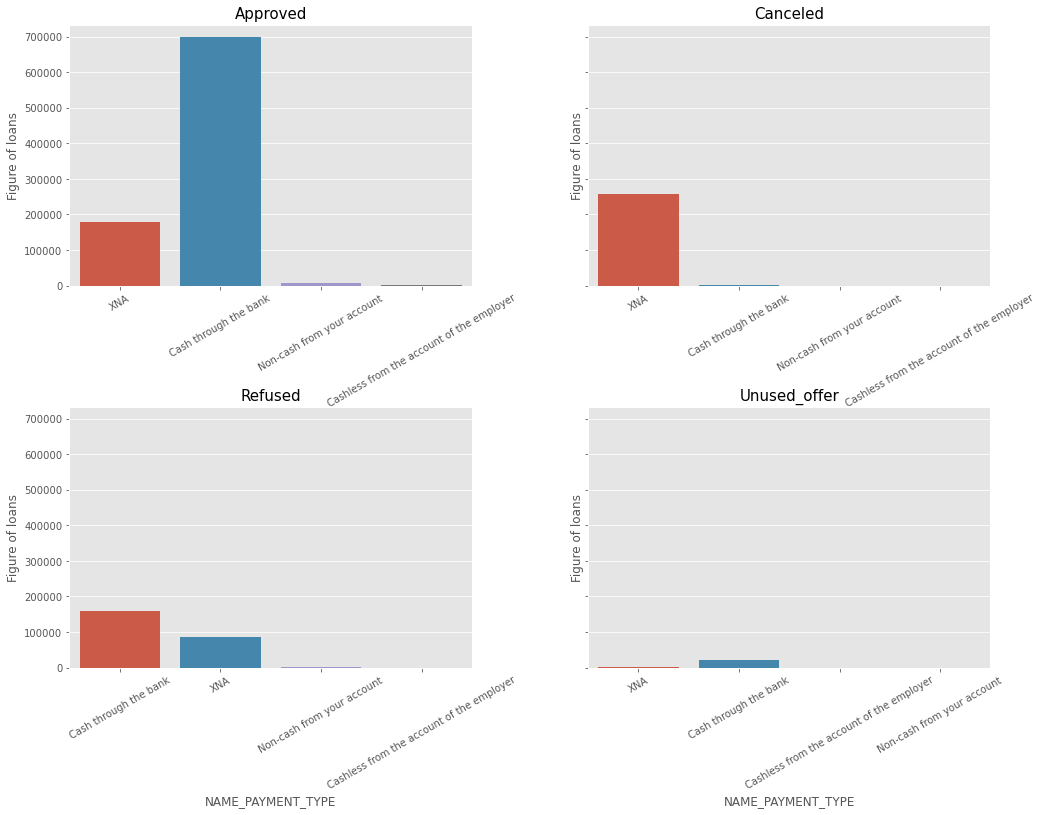

In [329]:
final_df_plots('NAME_PAYMENT_TYPE')

### The loans have been approved,refused and kept as unused offer are highest for the clients who have opted for payment option as 'cash through the bank' and cancelled for the clients who opted XNA mode of payment.

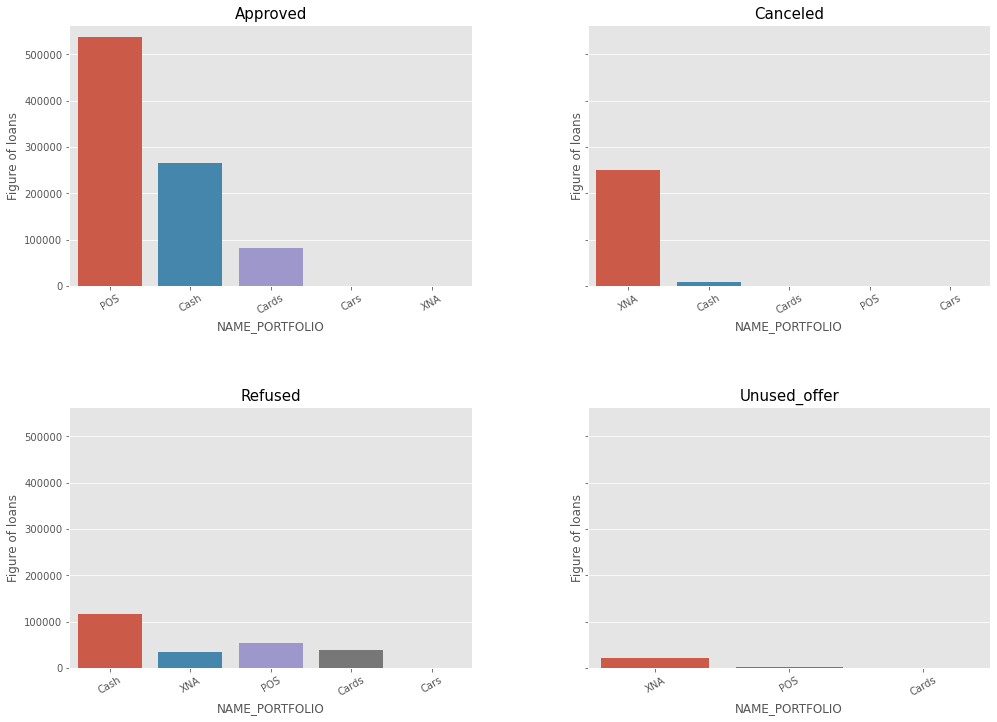

In [331]:
final_df_plots('NAME_PORTFOLIO')

### The most loans which have been approved have been applied through POS and through all the other modes have been either cancelled,refused or kept as unused offer.

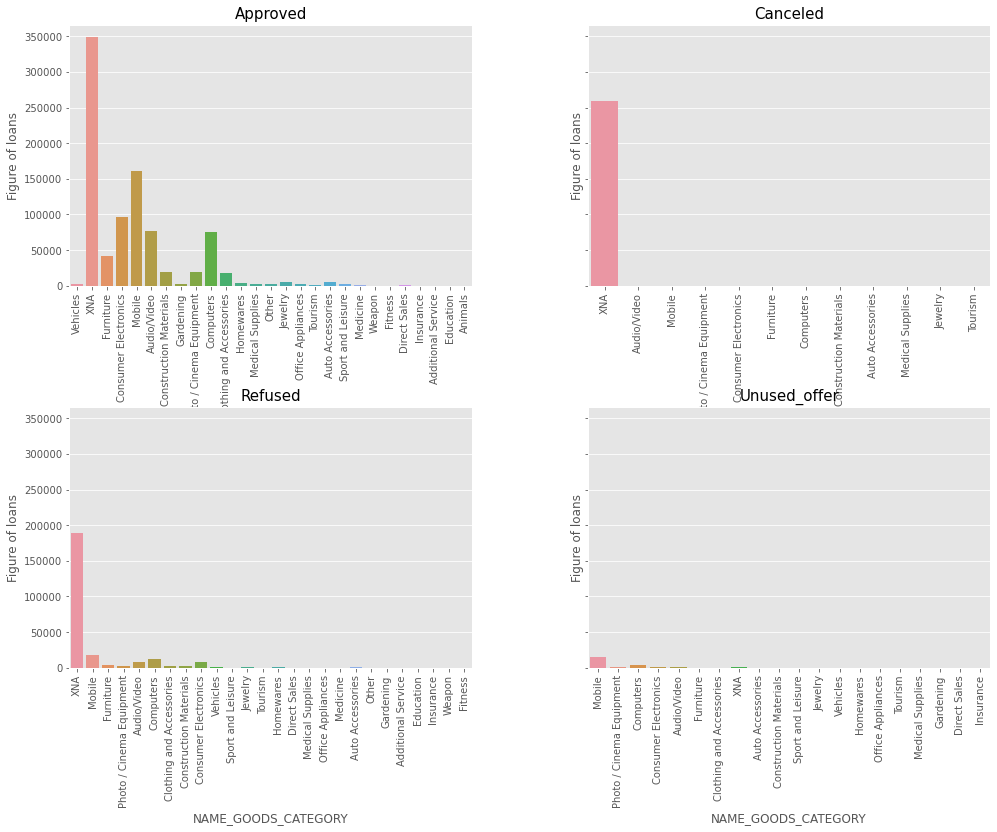

In [336]:
final_df_plots('NAME_GOODS_CATEGORY')

### The XNA category is highest in loan approval, cancelled,refused and unused offers are maximum in case of mobile.

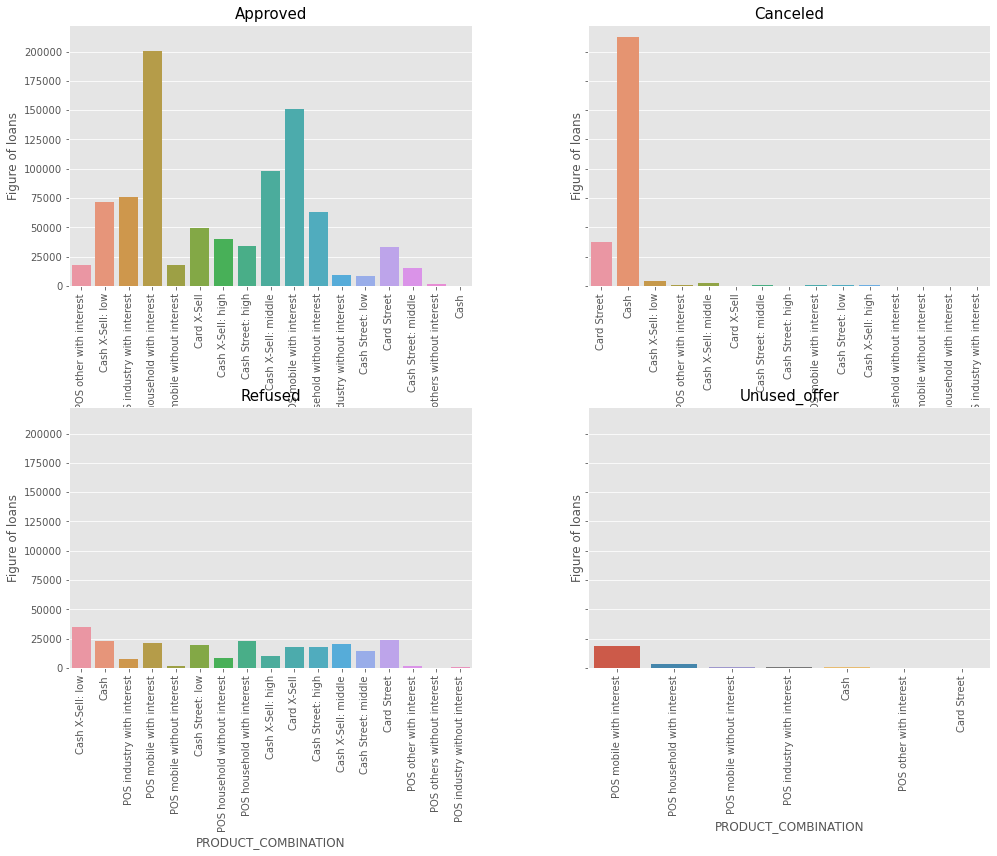

In [339]:
final_df_plots('PRODUCT_COMBINATION')

### The most approved loan category is POS household with interest , most cancelled loan category is cash loans and most unused offers include POS mobile with interest.

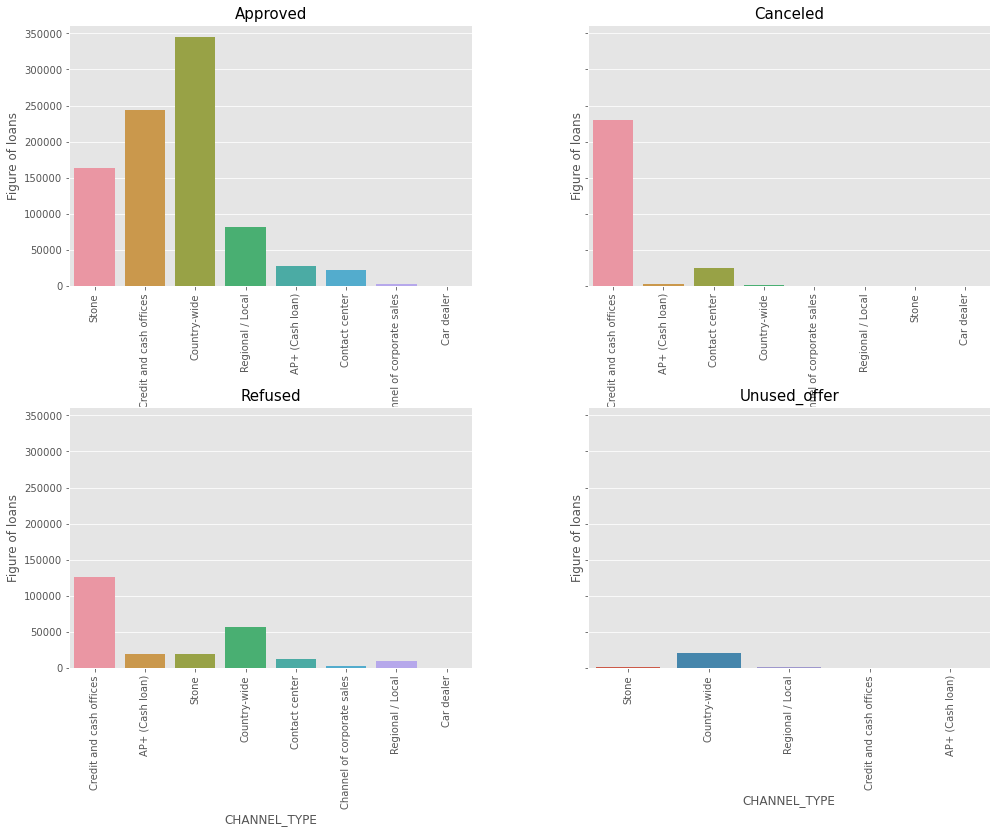

In [349]:
final_df_plots('CHANNEL_TYPE') 

### Maximum approved loans have been applied via country-wide ans credit and cash offices channel type. However loans applied through credit and cash offices have largely been cancelled and refused.
### The unused offers are maximum in case of country-wide channel type.